<a href="https://colab.research.google.com/github/wuke0708/5001/blob/main/CIV_Group2_f8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 ## 1.Title & Introduction
 - **Project Title:** Data analysis and prediction model construction for the survival of the Titanic
 - **Team Members & Roles:**
 * Junting Wu:Team leader,Data Analyst
 * Hong Xiao:Data Analyst,Model tester
 * Kuangfeng Gong: Data Analyst,ML Engineer
 * Linyun Zheng: ML Engineer,Storytelling Specialist
 * Yiran Liu: Data Analyst,Model tester
 * Ziyan Wan: Data Analyst,Storytelling Specialist
 - **Project Overview & Objectives:**
 This project utilizes the Titanic passenger dataset to investigate the complex interplay of various factors that influenced survival during the 1912 disaster. The dataset encompasses a range of variables, including passenger survival outcome (survived), demographic details (name, age, sex), socioeconomic status (pclass, fare), family dynamics (sibsp, parch) and travel details (embarked, cabin, ticket). By examining these variables, the project aims to quantify their individual and combined impacts on survival rates, revealing potential biases and patterns in the evacuation process.

 The primary objective is to develop a robust predictive model that can accurately forecast survival outcomes based on the available passenger data. This model will be informed by a thorough analysis of the dataset, which will include quantifying the influence of each variable on survival. For instance, the analysis will assess how factors such as age, gender, and passenger class interact to affect the likelihood of survival. Additionally, the project will explore the role of family size, fare paid, and embarkation point, providing a comprehensive understanding of the factors that determined survival.

 By developing this predictive model, the project seeks to validate historical accounts of the disaster and uncover any systemic inequalities in the evacuation process. The insights gained from this analysis will not only enhance our understanding of the Titanic tragedy but also inform the development of equitable emergency response protocols for modern crises.e emergency response protocols in modern crises.

## 2. Dataset Overview & Narrative
### 2.1. Dataset Description
- **Introduction:**
The Titanic dataset, From the learning materials of the course, contains records of 891 passengers aboard the RMS Titanic during its ill-fated 1912 maiden voyage. This sample represents approximately 40% of the total passengers and crew (2,224 individuals), with data encompassing demographic, socioeconomic, and travel-specific attributes. Key variables include survival status (Survived: 0/1), passenger class (Pclass: 1st, 2nd, 3rd), name (Name), gender (Sex), age (Age), number of siblings/spouses (SibSp) and parents/children (Parch) aboard, ticket details (Ticket), fare paid (Fare), cabin number (Cabin), and embarkation port (Embarked: C = Cherbourg, Q = Queenstown, S = Southampton). Notable gaps exist, particularly in the Age (≈20% missing) and Cabin (≈77% missing) fields, which require careful handling during analysis. The dataset serves as a critical resource for exploring survival disparities tied to gender, class, and familial relationships during the disaster.

- **Feature Overview:**

 The Titanic dataset includes the following critical features, each contributing uniquely to understanding survival patterns during the disaster:
* Survival Outcome
 * Survived: Binary target variable (0 = died, 1 = survived) used to model relationships between features and outcomes.
* Demographic Details
 * Sex: Central to testing the "women and children first" protocol. Historical accounts suggest gender heavily influenced survival, with women prioritized.
 * AgeLevel: Age affects physical strength and social status. Younger or older people often receive preferential treatment in groups (respecting the elderly and caring for the young). Here, they can be grouped as (child, young, midlife, aged) and extracted based on Age
 * Name: Including surname, given name, and possible titles (such as Mr., Mrs., Miss, Master, etc.). These titles can reflect the social status and age range of passengers.
* Socioeconomic Status
 * Pclass (Passenger Class): A proxy for wealth and social hierarchy. Higher classes (1st) had cabin locations closer to lifeboats, potentially increasing survival odds.
 * Fare: Correlates with Pclass; higher fares may indicate better access to resources or evacuation advantages.
* Travel-Specific Attributes
 * Cabin: Cabin location (e.g., proximity to decks) might correlate with survival, but ~77% missing data limits direct analysis. Partial codes (e.g., "C123") can infer deck levels for subgroups.
 * Embarked: Embarkation port (Cherbourg, Queenstown, Southampton) may reflect regional socioeconomic differences, indirectly linking to class or survival resources.
* Family Dynamics
 * FamilySize(SibSp (Siblings/Spouses) & Parch (Parents/Children)): Combined as family size, these variables explore whether traveling with family improved survival (e.g., group coordination) or hindered it (e.g., slower evacuation).

From the previous analysis, we have listed the relationship between some key features and the survival rate for analysis. To create the model, we will extract some new feature values. The feature values that need to be extracted for this model are listed as follows:

 * IncomeClass: Income determines the type of ship ticket purchased, which in turn determines the location of the cabin and social status. Grouped as no-income, lower-income, middle-income, upper-income, it can be extracted based on **Fare**

 * SocialTitle: In group activities, different identities obviously also affect group decision-making; Here, they are grouped as Mrs, Miss, Mr and Master, extracted based on **Name**.

 * SocialClass (social status) : A person may not have a lot of money, but the occupation he is engaged in and his noble status are influential in group activities. It is divided into lower-class, middle-class and upper-class, extracted based on **Title** and **IncomeClass**

 * FamilyType: Divide the number of family members into several grades

 * Mates (number of companions) : The number of people traveling together during this voyage (how many people use the same Ticket)

 * TravelAlone (whether traveling alone or not) : Mates + FamilySize. Whether it's a friend or family member, having one more acquaintance by your side might increase your chances of survival compared to others


Relevance to Analysis
 These features collectively reveal how structural inequalities (e.g., class-based resource access) and societal norms (e.g., gender prioritization) shaped life-and-death decisions. For example:
 * Sex and Age test the reality of ethical evacuation policies.
 * Pclass and Fare quantify privilege in crisis access.

### 2.2. Revised Data Questions & Narrative
- **Revisited Data Questions:**
- **EDA Related Questions**
 1. Is the principle of prioritizing women reflected in all age groups (children and adolescents, adults, elderly)?
 2. Could there be differences in survival rates among passengers of different seat classes during rescue operations due to different priorities?
 3. Whether passengers boarding ships at different ports have different characteristics leads to different survival rates?
 4. Could the differences in family situations possibly affect the rescue rate to a certain extent by influencing the survival beliefs of the passengers on the ship?
 5. Passengers with different names represent their different genders, social statuses, occupations, etc. Does the difference in their identities affect the probability of being survived?
- **ML Related Questions:**
 1. When controlling for other variables, which of the low-correlation engineering features and the high-correlation engineering features improves the model's prediction ability the most significantly?
 2. When there is noise in the input data (such as random perturbations of age ±5 years), which model has a higher stability in predicting results?

- **Narrative Integration:**
The analysis began with basic EDA to understand the dataset and identify potential relationships between variables. Feature engineering was then performed to create new variables that might improve model performance. Finally, machine learning models were developed and evaluated to predict passenger survival. The insights gained provide a deeper understanding of the factors that influenced survival on the Titanic and demonstrate the power of data science to analyze historical events.

## 3. Complete Data Science Workflow
### 3.1. Exploratory Data Analysis (EDA)
- **Comprehensive Visualisations & Statistics:**

Data reading
- Import libiraries

In [96]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

- Load data: Convert CSV file into a Pandas dataframe

In [97]:
#Read in the csv file and convert to a Pandas dataframe
df = pd.read_csv("https://raw.githubusercontent.com/wuke0708/5001/refs/heads/main/Titanic-Dataset.csv")

Simple analysis and processing of data
- Viewing the dataframe

In [98]:
#Return number of rows and columns
df.shape,df.columns

((891, 12),
 Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
        'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
       dtype='object'))

In [99]:
#Return first 5 rows of the dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [100]:
#take a look at the descriptive statistics of the data below
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


The data shows that there are a total of 891 passengers and 12 columns of features in the training dataset, among which three columns of data are missing:
1. Age: There are only 714 complete records, and 177 records are missing;
2. Cabin: Only 204 passengers are known, and 687 records are missing. The number of missing records is quite large;
3. Embarked : Only two records are missing.

- Handling of missing values




In [101]:
# For missing Embarked values, fill in using the most common categories
df.Embarked[df.Embarked.isnull()] = df.Embarked.dropna().mode().values
# For the Cabin number, since there is too much missing data, the missing data is replaced with 'U0' to indicate unknown
df['Cabin'] = df.Cabin.fillna('U0')
# For age, the average is used to fill in the missing values
df['Age']=df['Age'].fillna( df['Age'].mean() )

In [102]:
#Return first 5 rows of the dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


Exploratory analysis

- Overview of Basic Data Information

Text(0.5, 1.0, 'Passenger Age Distribution')

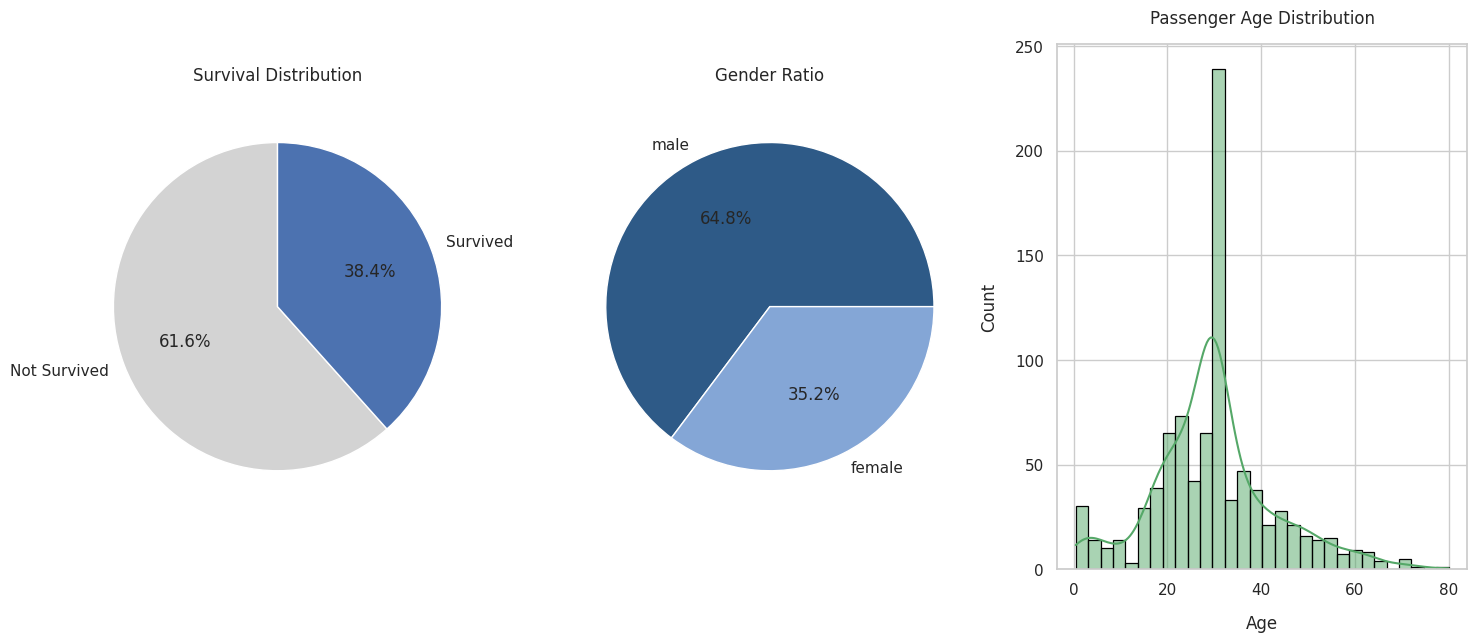

In [103]:
# Configure global settings
plt.figure(figsize=(18, 15))

# Survival Ratio Pie Chart
plt.subplot(2, 3, 1)
survival_counts = df['Survived'].value_counts()
plt.pie(survival_counts,
        labels=['Not Survived', 'Survived'],
        autopct='%1.1f%%',
        colors=['#D3D3D3', '#4C72B0'],
        startangle=90)
plt.title("Survival Distribution")

# Gender Distribution
plt.subplot(2, 3, 2)
gender_counts = df['Sex'].value_counts()
plt.pie(gender_counts,
        labels=gender_counts.index,
        autopct='%1.1f%%',
        colors=['#2E5A87', '#84A6D6'])
plt.title("Gender Ratio")

# Age Distribution Histogram
plt.subplot(2, 3, 3)
sns.histplot(df['Age'].dropna(),
            kde=True,
            color='#55A868',
            edgecolor='black')
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Passenger Age Distribution")

Based on the data, it is drawn as shown in the above figure. From the figure, we can obtain some information:
- Less than half of the people were survived and most of them died.
- More men boarded the ship, twice as many as women.
- It can be seen from the age distribution that the age distribution of the passengers is relatively scattered and has a large span (Excluding the data outliers caused by the loss of some age data, the average age was added to handle the lost data).

Next, we will further analyze the impact of different parameters on the survival rate and their direct relationship.

**1. The survival situations of different ages and genders**

In [104]:
# Calculate survival rates by gender
gender_survival_rate = df.groupby('Sex')['Survived'].mean().reset_index()

# Convert survival rates to percentage
gender_survival_rate['Survival Rate (%)'] = gender_survival_rate['Survived'] * 100

# Print the results table
print(gender_survival_rate[['Sex', 'Survival Rate (%)']])

      Sex  Survival Rate (%)
0  female          74.203822
1    male          18.890815


By calculating the survival rates of different genders, we found that the survival rate of women is much higher than that of men. Then, how does this characteristic manifest in different age groups?**(Q1)**

In [105]:
# Create age groups
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 15, 36, 60, 90], labels=['0-15', '15-36', '36-60', '60-90'])

# Calculate survival rates by age group
age_survival_rate = df.groupby('AgeGroup')['Survived'].mean().reset_index()

# Convert survival rates to percentage
age_survival_rate['Survival Rate (%)'] = age_survival_rate['Survived'] * 100

# Print the results table
print(age_survival_rate[['AgeGroup', 'Survival Rate (%)']])

  AgeGroup  Survival Rate (%)
0     0-15          59.036145
1    15-36          36.052202
2    36-60          38.728324
3    60-90          22.727273


By calculating the survival rates of different genders and ages, we found that the survival rate of women is much higher than that of men, and younger people have higger rate of survival.

Is the principle of prioritizing women reflected in all age groups (children and adolescents, adults, elderly)?（Q1)

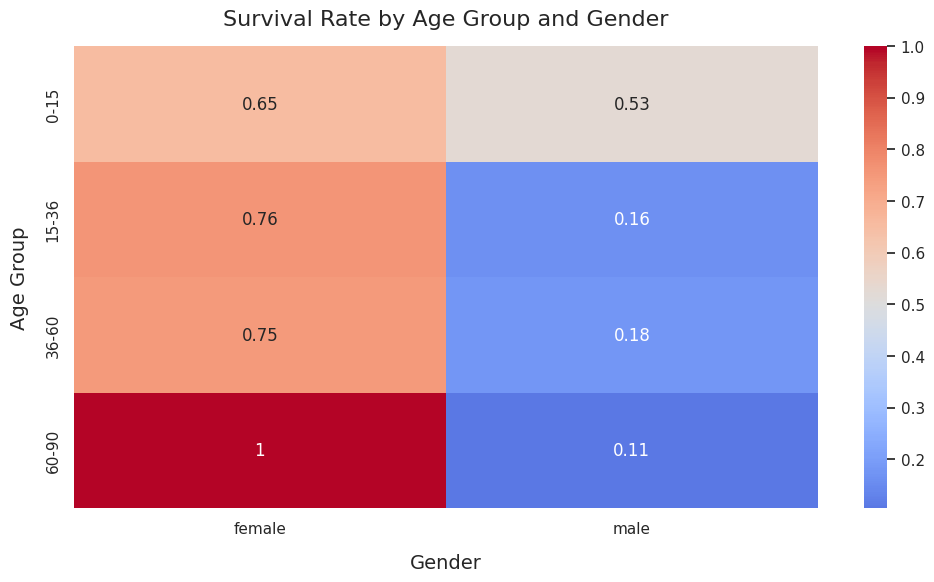

In [106]:
# Combines age and gender factors to analyze survival rates
plt.figure(figsize=(12, 6))
sns.heatmap(df.pivot_table(index='AgeGroup', columns='Sex', values='Survived'), annot=True, cmap='coolwarm', center=0.5)
plt.title('Survival Rate by Age Group and Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Age Group', fontsize=14)
plt.show()

Base on the data, we can obtain some informations:
* The principle of "women first" is very evident in adults and the elderly, with women having significantly higher survival rates than men in these two age groups.
* In the groups of children and adolescents, there is not much difference in survival rates between females and males, which may be due to the principle of "child first" also playing a role.
* Overall, the data supports the impact of the "women first" principle across different age groups, especially among adults and the elderly, and this principle seems to be more widely followed.


**2. The survival status of each passenger level**





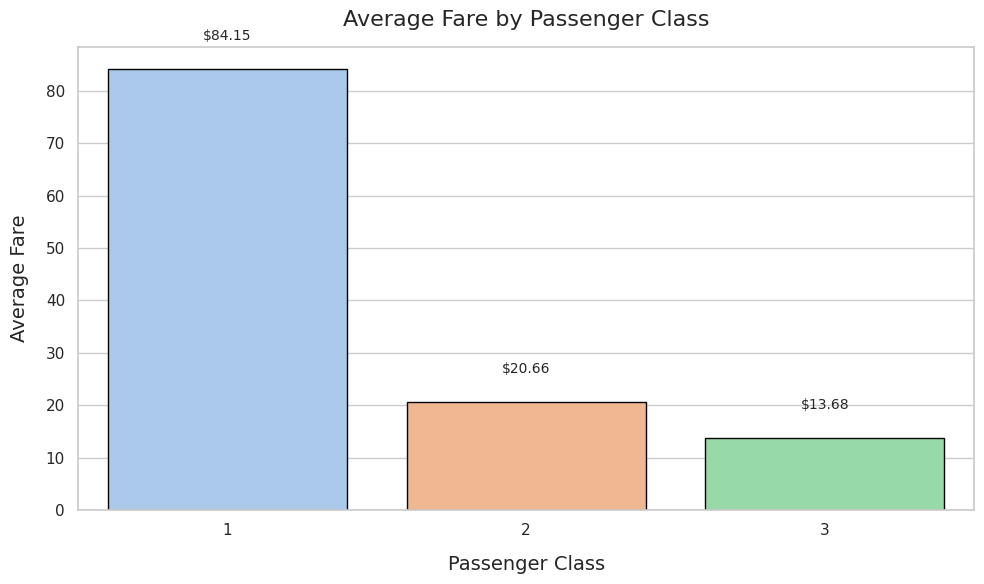

In [107]:
# Calculate average fare by passenger class
class_average_fare = df.groupby('Pclass')['Fare'].mean().reset_index()

# Visualization setup
plt.figure(figsize=(10, 6))

# Create a bar plot for average fares
sns.barplot(x='Pclass', y='Fare', data=class_average_fare, palette='pastel',
            capsize=0.1, edgecolor='black')
plt.title('Average Fare by Passenger Class', fontsize=16)
plt.xlabel('Passenger Class', fontsize=14)
plt.ylabel('Average Fare', fontsize=14)

# Add data labels for average fares
for idx, row in class_average_fare.iterrows():
    plt.text(idx, row['Fare'] + 5, f"${row['Fare']:.2f}",
             ha='center', va='bottom', fontsize=10)

# Adjust layout and display the plot
plt.tight_layout()

From the table, we can find that the average ticket prices of different seat classes have significant differences. The first-class has the highest ticket price, followed by the second-class , and the third-class has the lowest ticket price.

So could there be differences in survival rates among passengers of different seat classes during rescue operations due to different priorities? **(Q2)**

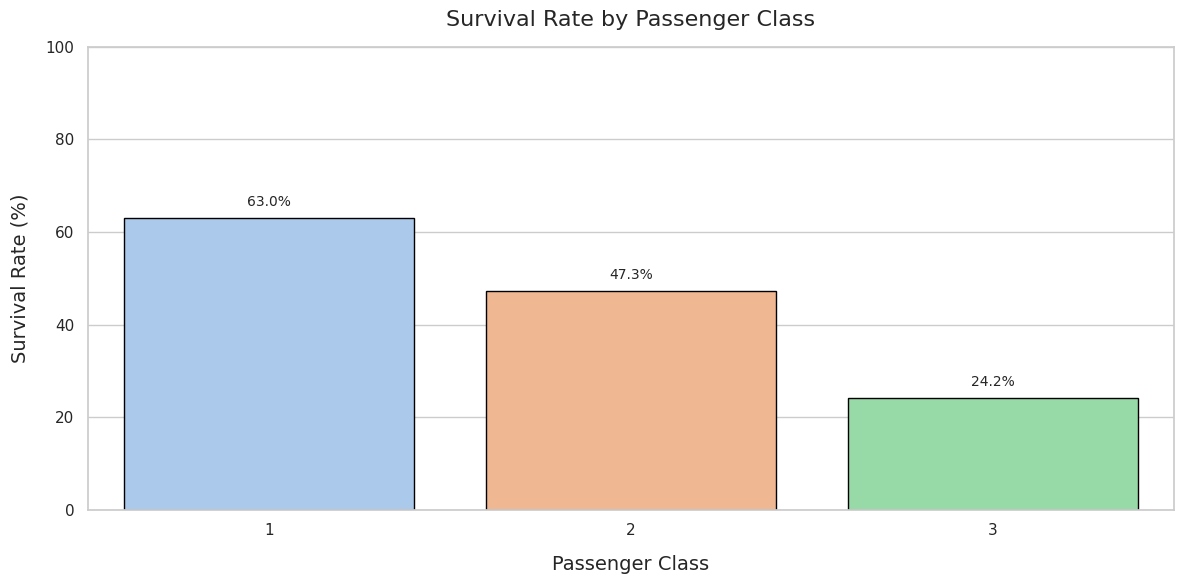

In [108]:
# Calculate survival rates by passenger class
class_survival_rate = df.groupby('Pclass')['Survived'].mean().reset_index()

# Convert survival rates to percentage
class_survival_rate['Survival Rate (%)'] = class_survival_rate['Survived'] * 100

# Visualization setup for Passenger Class
plt.figure(figsize=(12, 6))
sns.barplot(x='Pclass', y='Survival Rate (%)', data=class_survival_rate, palette='pastel',
            capsize=0.1, edgecolor='black')
plt.title('Survival Rate by Passenger Class', fontsize=16)
plt.xlabel('Passenger Class', fontsize=14)
plt.ylabel('Survival Rate (%)', fontsize=14)
plt.ylim(0, 100)

# Add data labels for survival rates
for idx, row in class_survival_rate.iterrows():
    plt.text(idx, row['Survival Rate (%)'] + 2, f"{row['Survival Rate (%)']:.1f}%",
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

It is obvious that as the cabin class decreases, the survival rate also decreases to a certain extent.

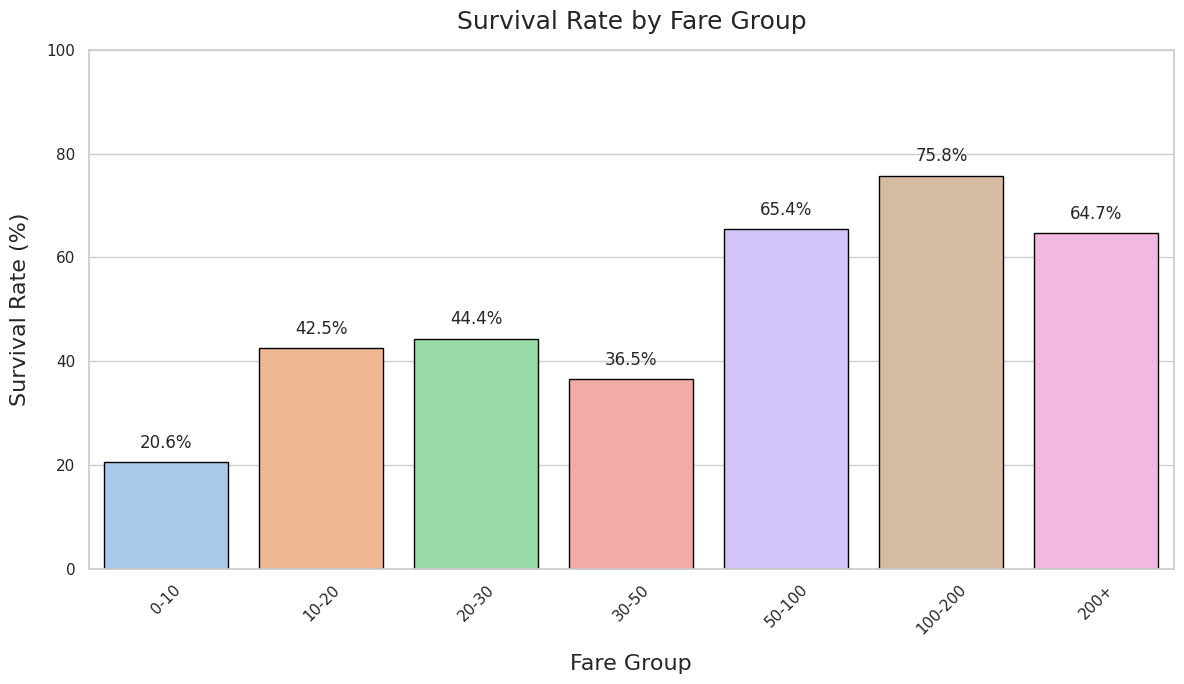

In [109]:
# Create more detailed fare groups
df['FareGroup'] = pd.cut(df['Fare'], bins=[0, 10, 20, 30, 50, 100, 200, 500],
                          labels=['0-10', '10-20', '20-30', '30-50', '50-100', '100-200', '200+'])

# Calculate survival rates by fare group
fare_survival_rate = df.groupby('FareGroup')['Survived'].mean().reset_index()

# Convert survival rates to percentage
fare_survival_rate['Survival Rate (%)'] = fare_survival_rate['Survived'] * 100

# Visualization setup
plt.figure(figsize=(12, 7))

# Create a bar plot for survival rates
sns.barplot(x='FareGroup', y='Survival Rate (%)', data=fare_survival_rate, palette='pastel',
            capsize=0.1, edgecolor='black')
plt.title('Survival Rate by Fare Group', fontsize=18)
plt.xlabel('Fare Group', fontsize=16)
plt.ylabel('Survival Rate (%)', fontsize=16)
plt.ylim(0, 100)

# Add data labels for survival rates
for idx, row in fare_survival_rate.iterrows():
    plt.text(idx, row['Survival Rate (%)'] + 2, f"{row['Survival Rate (%)']:.1f}%",
             ha='center', va='bottom', fontsize=12)

# Adjust layout and display the plot
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.tight_layout()
plt.show()

Generally speaking, there is a trend that the higher the ticket price, the higher the survival rate.

Analyze from the above figure, passenger level is an important feature affecting rescue. Further speaking, passengers who pay more may have a higher priority in rescue operations.

**3.Examine the impact of gender and fare on survival rate under the superposition of effects**

In the previous study, we have found that women and those with higher ticket prices have a higher survival rate. So when these two factors are combined, what will happen?

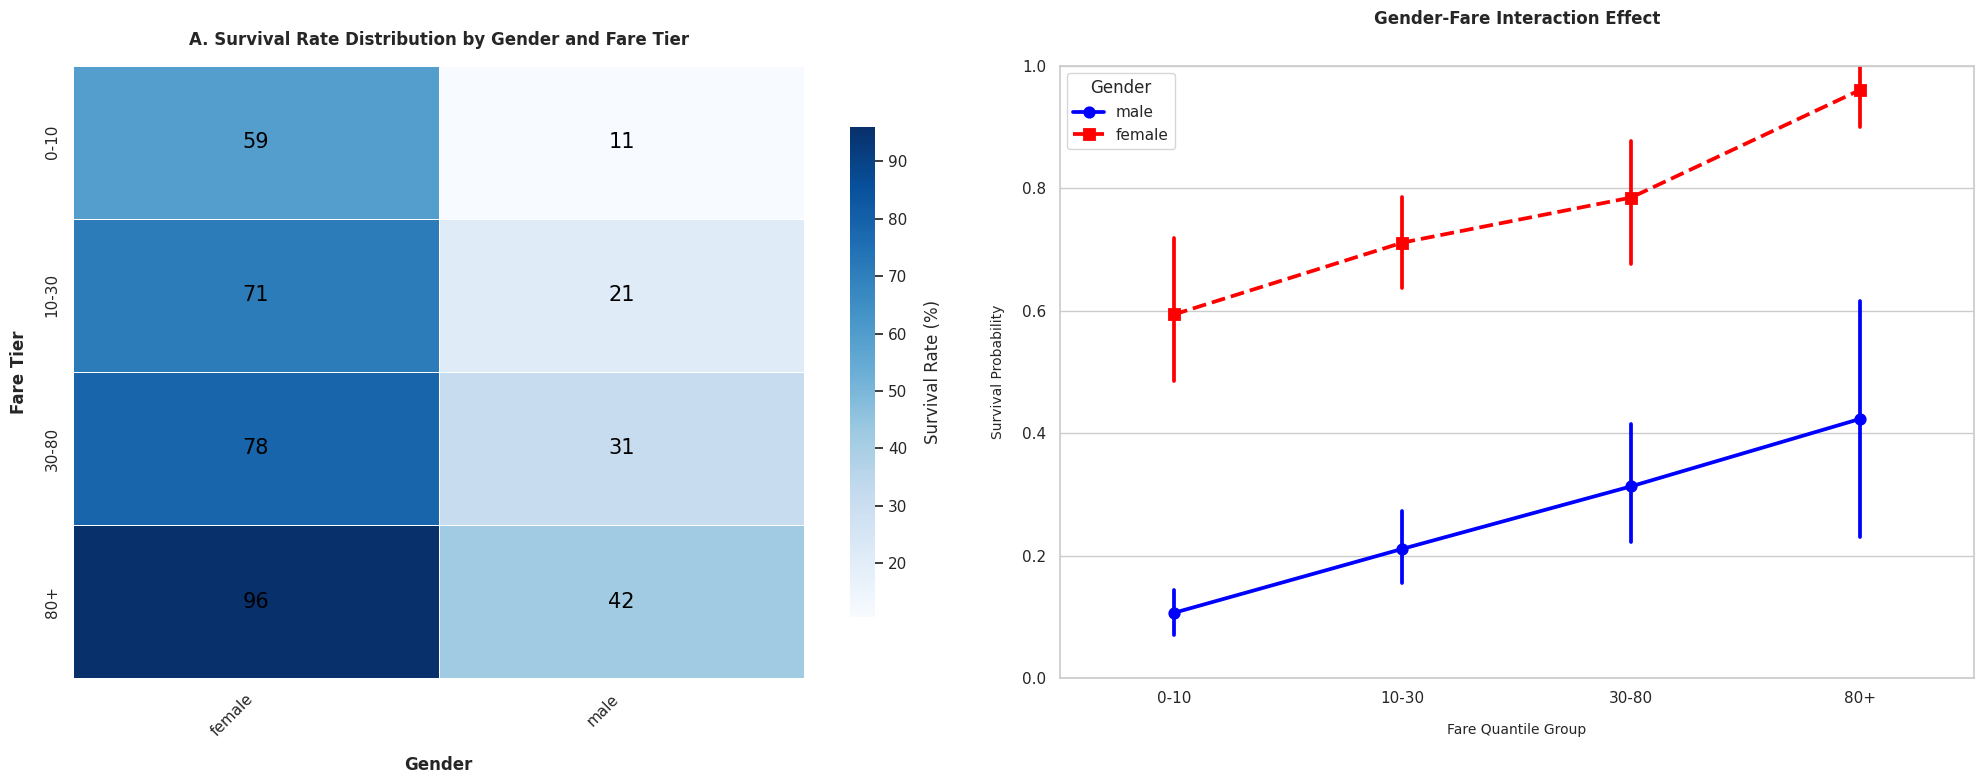

In [110]:
# 1. Dynamic Fare Tier Creation
fare_bins = [0, 10, 30, 80, float('inf')]
FARE_LABELS = ['0-10', '10-30', '30-80', '80+']

df['Fare_Group'] = pd.cut(
    df['Fare'],
    bins=fare_bins,
    labels=FARE_LABELS,
    right=False  # Include left edge, excluding right edge
)

# 2. Create Survival Rate Matrix
survival_matrix = (
    df.groupby(['Sex', 'Fare_Group'], observed=False)['Survived']
    .mean()
    .unstack()
    .T * 100
)

# 3. Visualization Configuration
plt.figure(figsize=(20, 8))
plt.rcParams.update({
    'font.family': 'sans-serif',
    'axes.titlepad': 15,
    'axes.labelpad': 12
})

# Subplot 1: Survival Rate Heatmap
plt.subplot(1, 2, 1)
heatmap = sns.heatmap(
    survival_matrix,
    annot=True,
    fmt=".0f",
    cmap="Blues",
    linewidths=0.5,
    cbar_kws={'label': 'Survival Rate (%)', 'shrink': 0.8},
    annot_kws={"size": 15, "va": 'center', "color": '#000000'}
)

heatmap.set_title('A. Survival Rate Distribution by Gender and Fare Tier', fontweight='bold')
heatmap.set_xlabel('Gender', fontweight='semibold')
heatmap.set_ylabel('Fare Tier', fontweight='semibold')
plt.xticks(rotation=45, ha='right', fontsize=11)

# Subplot 2: Interactive Effect Visualization
plt.subplot(1, 2, 2)
sns.pointplot(x='Fare_Group', y='Survived', hue='Sex', data=df,
              palette={'male':'blue', 'female':'red'},
              markers=['o', 's'], linestyles=['-', '--'])
plt.title('Gender-Fare Interaction Effect\n', fontsize=12, fontweight='bold')
plt.xlabel('Fare Quantile Group', fontsize=10)
plt.ylabel('Survival Probability', fontsize=10)
plt.ylim(0, 1)
plt.legend(title='Gender', loc='upper left')

plt.tight_layout()
plt.show()

Interaction Between Gender and Fare:
* Overall, the higher the ticket price, the higher the survival rate,however, in terms of presentation form, there are certain differences
 * Females: Survival rate rises from 59% to 96%,and the survival rate shows a steady upward trend.
 * Males: Survival rate increases from 11% to 42% ,the survival rate shows a steady upward trend.
* Gender effect: It can be seen from the figure that the survival rate of women has always been far higher than that of men.
* Fare effect: With the increase in ticket prices, the survival rate is also showing an upward trend.
* Interaction term: From the graph, it can be seen that as ticket prices increase, the impact on Female survival rate is slightly greater than that on male.High ticket prices may provide women with double protection (gender privilege + resource access), while men only gain the advantage of basic ticket prices.

**4.The survival status of each embarkation port**

After preprocessing the data, it was found that the boarding port information was accurate for two individuals. Since the number of missing data entries was relatively small compared to the total number of individuals, the mode was used to fill in the missing boarding port information. Then, the relationship between the boarding port and survival rate was analyzed.

In [111]:
#Read in the csv file and convert to a Pandas dataframe
df = pd.read_csv("https://raw.githubusercontent.com/wuke0708/5001/refs/heads/main/Titanic-Dataset.csv")

# Calculate the mode of the Embarked column
mode_port = df['Embarked'].mode()[0]

# Fill missing values ​​using the mode
df['Embarked'].fillna(mode_port, inplace=True)

# Verify if there are any missing
missing_after = df['Embarked'].isnull().sum()
print(f"The number of missing values ​​in the Embarked column after filling: {missing_after}")

The number of missing values ​​in the Embarked column after filling: 0


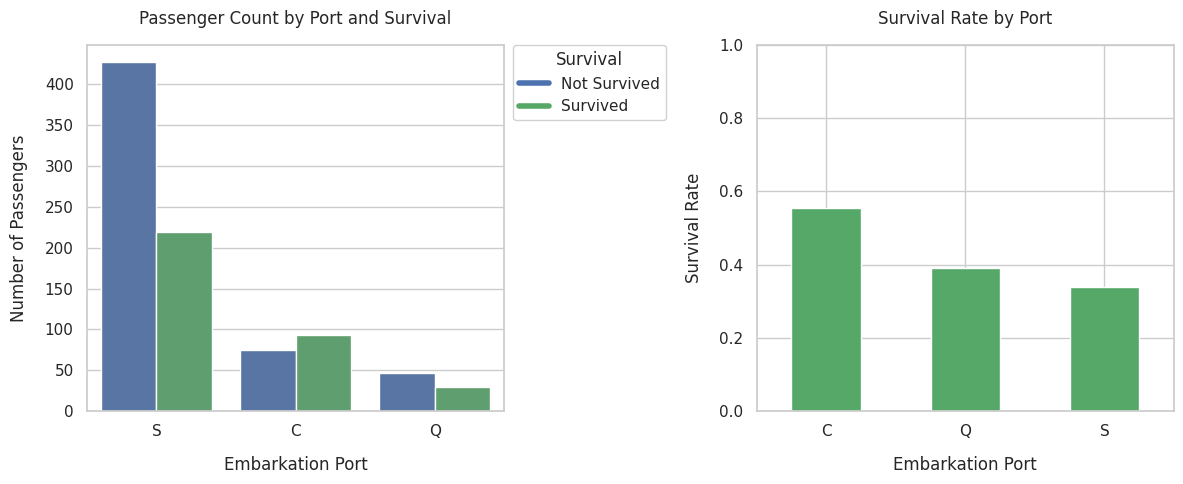

In [112]:
# Specify Embarked as an ordered category
sns.set(style="whitegrid")
colors = ['#4C72B0', '#55A868']
order = ['S', 'C', 'Q']
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot 1: Passenger Count by Port and Survival
sns.countplot(data=df, x='Embarked', hue='Survived', order=order, palette=colors, ax=axes[0])
axes[0].set_title('Passenger Count by Port and Survival')
axes[0].set_xlabel('Embarkation Port')
axes[0].set_ylabel('Number of Passengers')
axes[0].legend(title='Survived', labels=['No', 'Yes'])

# Plot 2: Survival Rate by Port
# Group by Embarked and calculate the survival rate
embark_rate = df.groupby('Embarked')['Survived'].mean()

embark_rate.plot(
    kind='bar', color=colors[1],
    ax=axes[1]
)
axes[1].set_title('Survival Rate by Port')
axes[1].set_xlabel('Embarkation Port')
axes[1].set_ylabel('Survival Rate')
axes[1].set_ylim(0, 1)
axes[1].tick_params(axis='x', rotation=0)

# Create custom legend handles
handles = [
    plt.Line2D([0], [0], color=colors[0], lw=4),
    plt.Line2D([0], [0], color=colors[1], lw=4)
]

# Add legend to the right of the first subplot
axes[0].legend(
    handles, ['Not Survived', 'Survived'],
    title='Survival',
    bbox_to_anchor=(1.02, 1),  # Position legend outside upper-right of subplot
    loc='upper left',
    borderaxespad=0,
    frameon=True,
    framealpha=0.9
)

plt.tight_layout()
plt.show()

It can be seen that the survival rate varies depending on the boarding port, with Port C having the highest survival rate, followed by Port Q, and Port S having the lowest.

Whether passengers boarding ships at different ports have different characteristics leads to different survival rates?**(Q3)**

In the previous analysis, it was found that women have a higher chance of survival than men, children have a higher chance of survival than adults, and passengers who purchased first or second-class tickets have a higher survival rate compared to those who bought third-class tickets. Does this pattern also apply to passengers boarding at different ports?

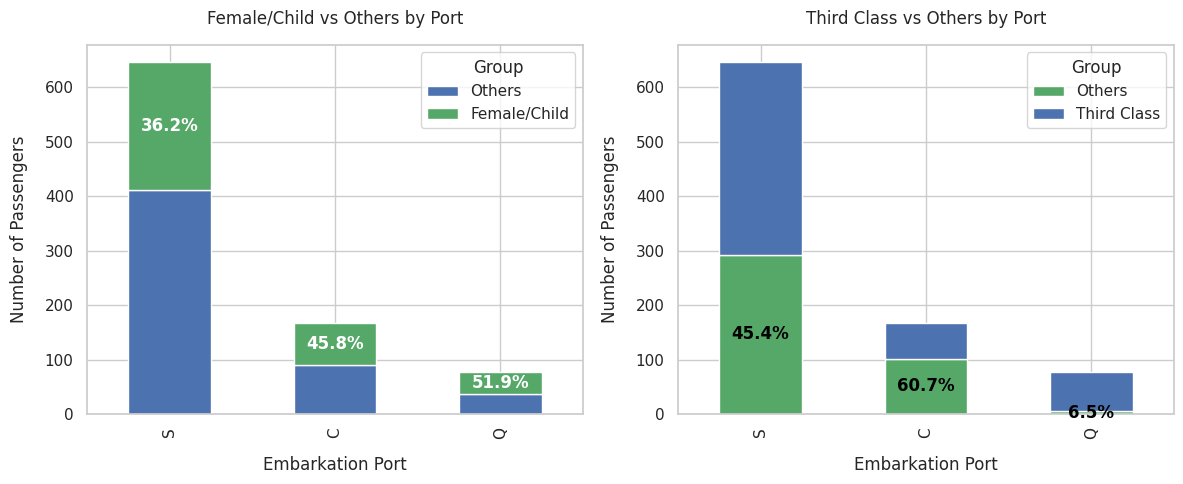

In [113]:
# Complete the following preprocessing
df['Embarked']   = df['Embarked'].fillna(df['Embarked'].mode()[0])
df['IsChild']   = df['Age'].fillna(13) <= 12
df['IsPriority']  = df['IsChild'] | (df['Sex'] == 'female')
df['IsThirdClass'] = df['Pclass'] == 3

# Aggregate count
order = ['S', 'C', 'Q']
counts_pri  = df.groupby(['Embarked','IsPriority']).size().unstack(fill_value=0).reindex(order)
counts_thrd = df.groupby(['Embarked','IsThirdClass']).size().unstack(fill_value=0).reindex(order)

# Calculate percentage
pct_pri  = counts_pri[True]  / counts_pri.sum(axis=1)  * 100
pct_other= counts_thrd[False] / counts_thrd.sum(axis=1) * 100

# Drawing
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Left：Female/Child vs Others
counts_pri.plot(kind='bar', stacked=True,
                color=['#4C72B0','#55A868'], ax=axes[0])
axes[0].set_title('Female/Child vs Others by Port')
axes[0].set_xlabel('Embarkation Port'); axes[0].set_ylabel('Number of Passengers')
axes[0].legend(['Others','Female/Child'], title='Group'); axes[0].tick_params(axis='x', rotation=90)

for i, port in enumerate(order):
    o = counts_pri.loc[port, False]
    f = counts_pri.loc[port, True]
    # In the "Female/Child" regional center
    axes[0].text(i, o + f/2, f'{pct_pri.loc[port]:.1f}%', ha='center', va='center',
                 color='white', fontweight='bold')

# Right：Third Class vs Others
counts_thrd.plot(kind='bar', stacked=True,
                 color=['#55A868','#4C72B0'], ax=axes[1])
axes[1].set_title('Third Class vs Others by Port')
axes[1].set_xlabel('Embarkation Port'); axes[1].set_ylabel('Number of Passengers')
axes[1].legend(['Others','Third Class'], title='Group'); axes[1].tick_params(axis='x', rotation=90)

for i, port in enumerate(order):
    o = counts_thrd.loc[port, False]
    # In the "Others" regional center
    axes[1].text(i, o/2, f'{pct_other.loc[port]:.1f}%', ha='center', va='center',
                 color='black', fontweight='bold')

plt.tight_layout()
plt.show()

The embarkation port not only determines where passengers boarded the ship, but also, to some extent, reflects their social background—such as their socioeconomic class or whether there were more women and children among them. These characteristics are closely linked to the likelihood of survival. Therefore, the embarkation port can be seen as a representative variable that, together with factors like gender and ticket class, jointly influences the chances of survival. This set of graphs further sheds light on the potential reasons for this connection:
* Among passengers who boarded at Port C, the proportion of women and children was relatively high (45.8%), and a large share held first- or second-class tickets—only 39.3% were in third class. This aligns with the previously observed pattern that women, children, and higher-class passengers had a greater chance of survival.

* Passengers from Port Q had the highest proportion of women and children (51.9%), but the vast majority were in third class (as high as 93.5%), which may explain why the overall survival rate was still not very high.

* In contrast, Port S had the largest number of passengers, but only 36.2% were women or children, and the proportion of third-class passengers was the highest at 54.6%. This likely contributed to its being the port with the lowest survival rate.

**5. The survival status of different family situations.**

In [114]:
# Calculate the total number of family members (including oneself) for each passenger.
df['FamilySize']=df['SibSp']+df['Parch']+1

# Calculate the survival rate by grouping according to family size.
family_survival=df.groupby('FamilySize')['Survived'].agg(Survival_Rate='mean',Passenger_Count='count').reset_index()
print(family_survival)

   FamilySize  Survival_Rate  Passenger_Count
0           1       0.303538              537
1           2       0.552795              161
2           3       0.578431              102
3           4       0.724138               29
4           5       0.200000               15
5           6       0.136364               22
6           7       0.333333               12
7           8       0.000000                6
8          11       0.000000                7


It can be seen that most people travel without the company of their families, but there are also quite a few who travel with their families.

So could the differences in family situations possibly affect the rescue rate to a certain extent? **(Q4)**

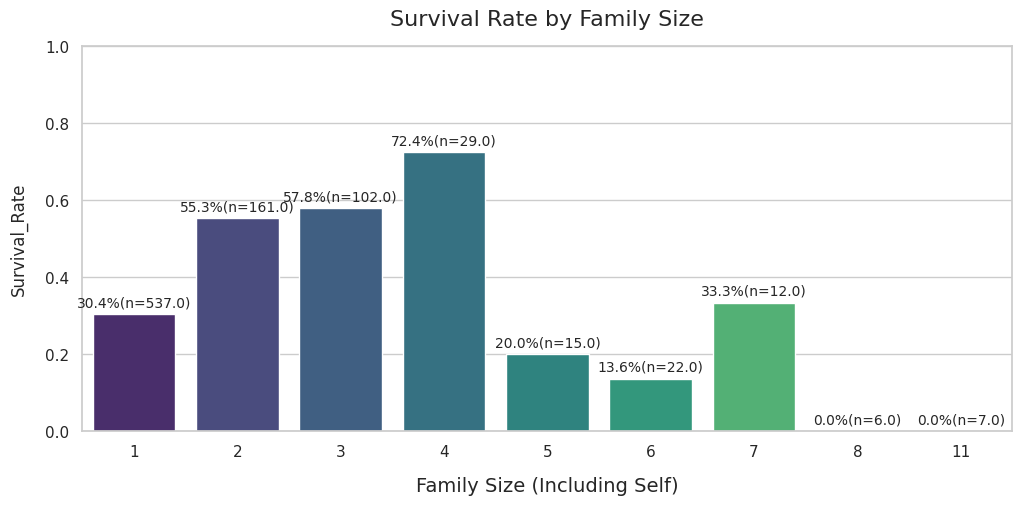

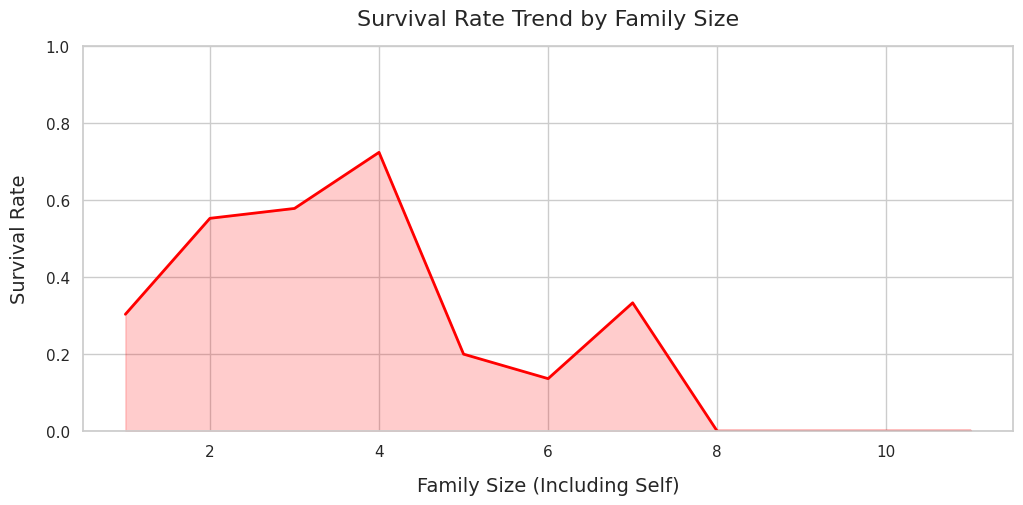

In [115]:
# Create a bar chart showing the relationship between family size and survival rate.
plt.figure(figsize=(12,5))
sns.barplot(x='FamilySize',y='Survival_Rate',data=family_survival,palette='viridis')
plt.title('Survival Rate by Family Size',fontsize=16)
plt.xlabel('Family Size (Including Self)',fontsize=14)
plt.ylim(0,1)
for idx,row in family_survival.iterrows():
  plt.text(idx,row['Survival_Rate']+0.02,f"{row['Survival_Rate']:.1%}(n={row['Passenger_Count']})",ha='center',fontsize=10)
plt.show()

# Plot a line chart to show the relationship between family size and survival rate.
plt.figure(figsize=(12,5))
sns.lineplot(x='FamilySize',y='Survival_Rate',data=family_survival,marker='',linewidth=2,color='red')
plt.fill_between(family_survival['FamilySize'],family_survival['Survival_Rate'],alpha=0.2,color='red')
plt.title('Survival Rate Trend by Family Size',fontsize=16)
plt.xlabel('Family Size (Including Self)',fontsize=14)
plt.ylabel('Survival Rate',fontsize=14)
plt.ylim(0,1)
plt.grid(True)
plt.show()

We can find that the survival rate does not keep increasing with the increase in the number of family members. The survival rate is the highest when the number of family members is equal to 4. The trend shown by the line chart is that when the family size exceeds 4, the survival rate drops sharply. When the number of family members is too large, the survival rate is even lower than that of passengers traveling without family members.

Different roles in the family may also determine the differences in survival rates. We can add the gender factor to the analysis for observation.

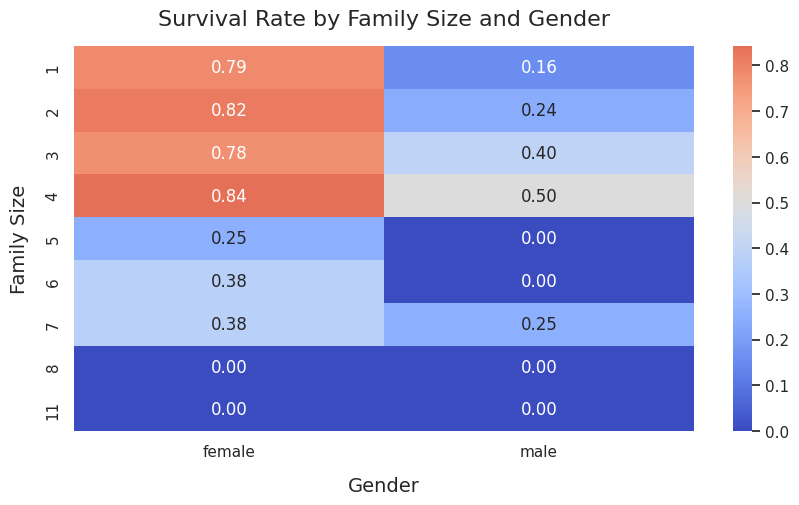

In [116]:
# Further analyze the differences in survival rates between males and females under different family sizes.
# Calculate the survival rates by grouping according to family size and gender.
family_sex_survival=df.groupby(['FamilySize','Sex'])['Survived'].mean().unstack()

# Plot a visual heatmap to show the differences in survival rates between males and females under different family sizes.
plt.figure(figsize=(10,5))
sns.heatmap(family_sex_survival,annot=True,cmap='coolwarm',fmt='.2f',center=0.5)
plt.title('Survival Rate by Family Size and Gender',fontsize=16)
plt.xlabel('Gender',fontsize=14)
plt.ylabel('Family Size',fontsize=14)
plt.show()

Through this table, we find that the survival rate of men in families of 1 to 4 people gradually increases with the increase in the number of people. In contrast, the survival rate of women remains almost unchanged. In families of more than five people, men hardly survive.

The possible reason is that men and women play different roles in the family. So one possible analytical direction to consider is to roughly extract a person's role in the family based on name, gender and age, and conduct research on survival rates by category.

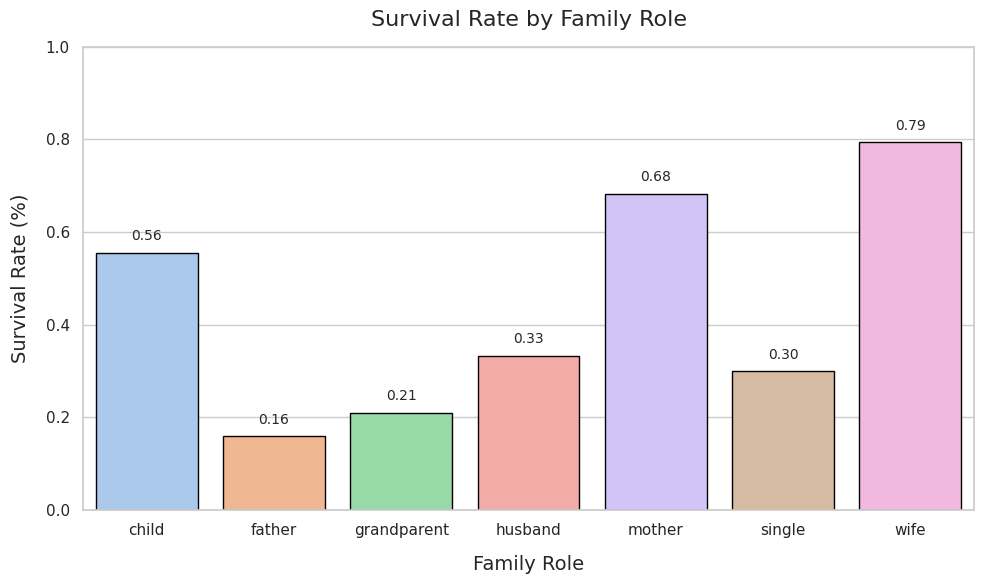

In [117]:
# Define a function to determine Family Role
def determine_family_role(row):
    if row['Age'] < 18 and row['Parch'] > 0:
        return 'child'
    elif row['Sex'] == 'female' and row['Parch'] > 0:
        return 'mother'
    elif row['Sex'] == 'male' and row['Parch'] > 0:
        return 'father'
    elif row['SibSp'] > 1:
        return 'husband'
    elif row['SibSp'] == 1 and row['Sex'] == 'female':
        return 'wife'
    elif row['Age'] >= 60:
        return 'grandparent'
    else:
        return 'single'

# Apply the function to create the FamilyRole column
df['FamilyRole'] = df.apply(determine_family_role, axis=1)

# Calculate counts and survival rates
family_role_summary = df.groupby('FamilyRole')['Survived'].agg(
    count='count',
    Survived_0=lambda x: (x == 0).sum(),
    Survived_1=lambda x: (x == 1).sum()
).reset_index()

# Calculate proportions
family_role_summary['proportions'] = family_role_summary['count'] / family_role_summary['count'].sum()

# Calculate survival rates
family_role_summary['Survival_Rate'] = family_role_summary['Survived_1'] / family_role_summary['count']

# Visualization setup
plt.figure(figsize=(10, 6))

# Create a bar plot for survival rates
sns.barplot(x='FamilyRole', y='Survival_Rate', data=family_role_summary, palette='pastel',
            capsize=0.1, edgecolor='black')

# Adding title and labels
plt.title('Survival Rate by Family Role', fontsize=16)
plt.xlabel('Family Role', fontsize=14)
plt.ylabel('Survival Rate (%)', fontsize=14)
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1 for percentage

# Add data labels for survival rates
for idx, row in family_role_summary.iterrows():
    plt.text(idx, row['Survival_Rate'] + 0.02, f"{row['Survival_Rate']:.2f}",
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

This table shows some facts:
* The survival rate of father is the lowest, while that of wife is the highest.
* Among them, the survival rates of children, mothers and wives are all relatively high (more than 50%).
* The survival rate of wives is slightly higher than that of mothers.

The fact hidden behind these phenomena might be that family members have given the chance of survival to women and children, and fathers might have chosen to sacrifice themselves in order to protect their families. mother, due to the entanglement of her child, might have affected her own survival probability.

**6. The survial status of travel alone**

From the above text, we find that the survival rate of people traveling alone without the company of other family members is relatively low. Then, can we analyze the survival rate of people traveling alone without co-residents (holding the same boat ticket number) and family members.

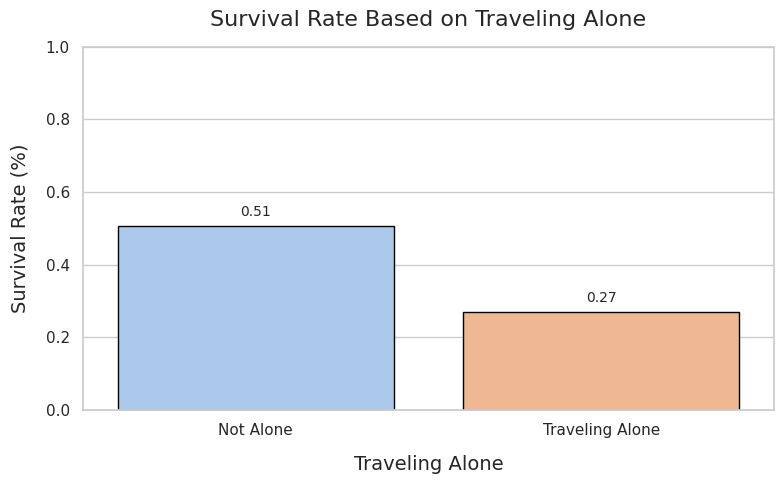

In [118]:
# 1. Calculate the number of mates (people with the same ticket)
df['Mates'] = df.groupby('Ticket')['Ticket'].transform('count') - 1  # Exclude the passenger themselves

# 2. Determine if traveling alone (Mates + FamilySize)
df['TravelAlone'] = (df['Mates'] + df['FamilySize'] <= 1)

# 3. Calculate survival rates based on TravelAlone
survival_analysis = df.groupby('TravelAlone')['Survived'].agg(
    count='count',
    Survived_0=lambda x: (x == 0).sum(),
    Survived_1=lambda x: (x == 1).sum()
).reset_index()

# Calculate survival rate
survival_analysis['Survival_Rate'] = survival_analysis['Survived_1'] / survival_analysis['count']

# Visualization setup
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))

# Create a bar plot for survival rates
sns.barplot(x='TravelAlone', y='Survival_Rate', data=survival_analysis, palette='pastel',
            capsize=0.1, edgecolor='black')

# Adding title and labels
plt.title('Survival Rate Based on Traveling Alone', fontsize=16)
plt.xlabel('Traveling Alone', fontsize=14)
plt.ylabel('Survival Rate (%)', fontsize=14)
plt.xticks(ticks=[0, 1], labels=['Not Alone', 'Traveling Alone'])
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1 for percentage

# Add data labels for survival rates
for idx, row in survival_analysis.iterrows():
    plt.text(idx, row['Survival_Rate'] + 0.02, f"{row['Survival_Rate']:.2f}",
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

It can be seen that the survival rate of those accompanied by others is significantly higher than that of those traveling alone.

**7. The survival status of differernt socialtitle**

Passengers with different names represent their different genders, social statuses, occupations, etc. Does the difference in their identities affect the probability of being survived? **(Q5)**

Survival Analysis by Title Category:
          SurvivalRate  PassengerCount
Title                                 
Mrs              0.794             126
Miss             0.704             186
Master           0.575              40
Doctor           0.429               7
Military         0.400               5
Nobility         0.333               3
Mr               0.158             518
Clergy           0.000               6


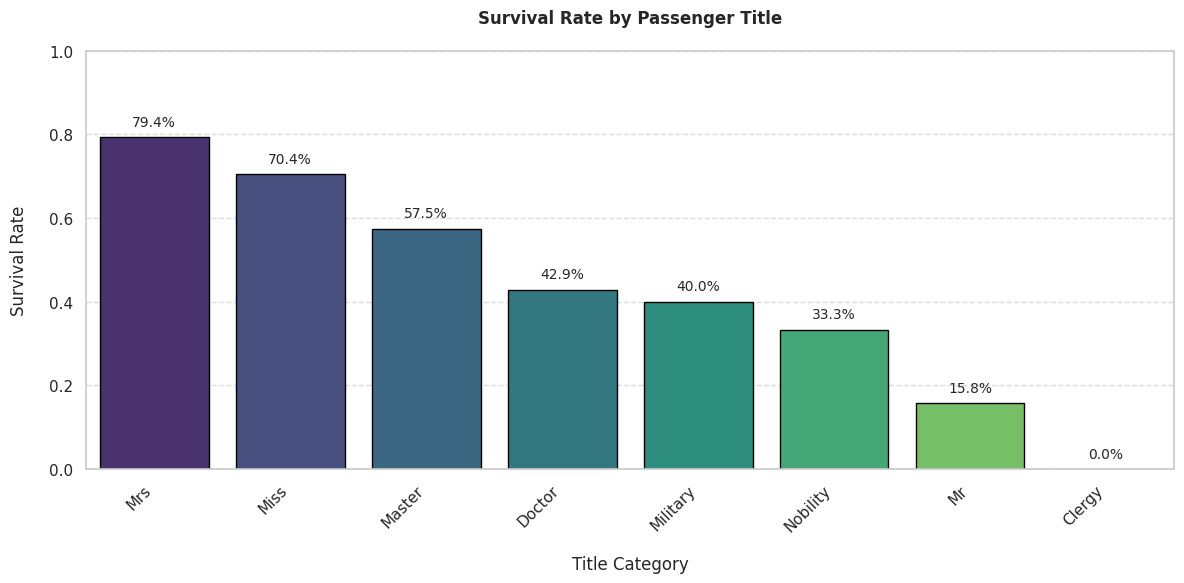

In [119]:
import re
def process_titles(df):
    """Process passenger titles with special handling for honorifics and professionals."""
# Extract base title
    df['Title'] = df['Name'].apply(lambda x: re.search(r'\b([A-Za-z]+)\.', x).group(1))

# Define preserved titles and their categories
    preserved_mapping = {
        'Dr': 'Doctor',
        'Rev': 'Clergy',
        'Col': 'Military',
        'Major': 'Military',
        'Capt': 'Military',
        'Lady': 'Miss',
        'Sir': 'Mr',
        'Countess': 'Nobility',
        'Don': 'Nobility',
        'Dona': 'Miss',
        'Jonkheer': 'Nobility'
    }

# Standardize common titles
    df['Title'] = df['Title'].replace({
        'Mlle': 'Miss',
        'Ms': 'Miss',
        'Mme': 'Mrs'
    })

# Merge rare titles (count < 10) not in preserved list
    title_counts = df['Title'].value_counts()
    rare_titles = [title for title in title_counts[title_counts < 10].index
                   if title not in preserved_mapping]

# Apply transformations
    df['Title'] = np.where(
        df['Title'].isin(preserved_mapping.keys()),
        df['Title'].map(preserved_mapping),
        np.where(
            df['Title'].isin(rare_titles),
            'Rare',
            df['Title']
        )
    )
    return df

# Load and process data
# df = pd.read_csv('titanic.csv')
df = process_titles(df)

# Analyze survival rates
title_analysis = df.groupby('Title').agg(
    SurvivalRate=('Survived', 'mean'),
    PassengerCount=('Survived', 'count')
).sort_values('SurvivalRate', ascending=False)

# Visualization
plt.figure(figsize=(12, 6))
sns.barplot(x=title_analysis.index, y='SurvivalRate', data=title_analysis,
            palette='viridis', edgecolor='black')

# Customize plot
plt.title('Survival Rate by Passenger Title', fontweight='bold', pad=20)
plt.xlabel('Title Category', labelpad=15)
plt.ylabel('Survival Rate', labelpad=15)
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display numerical results
print("Survival Analysis by Title Category:")
print(title_analysis.sort_values('SurvivalRate', ascending=False).to_string(float_format="%.3f"))

# Add value labels
for idx, value in enumerate(title_analysis['SurvivalRate']):
    plt.text(idx, value + 0.02, f'{value:.1%}',
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

Conclusions
*   The survival rates of Mrs And Miss are extremely high, which should follow the principle of giving priority to women. However, married women have a higher survival rate, perhaps they have a stronger will to survive because of their families
*   The survival rate of Master and Docter is around 50%.Intellectuals with higher education may have a better ability to save themselves in the most dangerous conditions.
*   There are relatively few samples of soldiers and nobles, so they are not considered.
*   All the priests died may because they had fulfilled their duties and given others the chance to escape.



- **Updated Insights:**

 Based on the above exploratory analysis, we can have some conclusions:

 * First of all, it is relatively clear that gender and age have a significant impact on survival rates. The principle of saving women and children first has been largely reflected in this disaster.
 * Secondly, the impact of ticket prices and cabin sizes on survival rates points to the fact that people with higher incomes and statures in the social class may have priority in rescue operations. This could be because their cabins are closer to the deck, or it could be because the escape measures equipped in higher-class cabins are more complete.
 * Finally, the power of family and companions cannot be ignored either. They may bring hope for life to people.

 Based on the above summary, in feature engineering, we can select and analyze the feature values based on this to create a survival rate prediction model.

### 3.2. Data Cleaning & Preprocessing

**3.2.1 Cleaning Procedures:**

In the previous EDA steps, we have already conducted simple processing on the data. But before modeling, we still need to process the data more meticulously and comprehensively.
- Handle missing value:


In [120]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings("ignore")

In [121]:
#Read in the csv file and convert to a Pandas dataframe
df = pd.read_csv("https://raw.githubusercontent.com/wuke0708/5001/refs/heads/main/Titanic-Dataset.csv")

In [122]:
#Take a look at the data types and the missing situations
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [123]:
#Display number missing values per column
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


The data shows that there are a total of 891 passengers and 12 columns of features in the training dataset, among which three columns of data are missing:
1. Age: There are only 714 complete records, and 177 records are missing;
2. Embarked : Only two records are missing.
3. Cabin: Only 204 passengers are known, and 687 records are missing. The number of missing records is quite large;

**For Age:**
It was found that all the names contained Title words such as "Mr." and "Mrs", so they were extracted and could be used as an auxiliary feature Title. Then, the median with the same title and Sex was used to fill it

In [124]:
# Extract titles from the Name column
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Fill missing Age values based on median Age for each Title and Sex
for title in df['Title'].unique():
    for sex in df['Sex'].unique():
        median_age = df[(df['Title'] == title) & (df['Sex'] == sex)]['Age'].median()
        df.loc[(df['Title'] == title) & (df['Sex'] == sex) & (df['Age'].isnull()), 'Age'] = median_age

# Check if there are still missing values in Age
print("Missing Age values after filling:", df['Age'].isnull().sum())

Missing Age values after filling: 0


**For Embarked:** There are only two missing Embarked. We can filter out these two pieces of information for observation.

In [125]:
# View the rows where Embarked data was lost
missing_embarked = df[df['Embarked'].isnull()]

# Display the rows with missing values
missing_embarked

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,Miss
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,Mrs


After reviewing the data, it was observed that two women shared the same Ticket "113572," stayed in the same Cabin "B28," and were in the same class (Pclass 1). This suggests they may know each other and likely traveled together, boarding the ship at the same port. Therefore, there is no need to handle them separately. Additionally, it is inferred that tickets sold at the same port are connected, so using the same first four digits of the ticket can indicate the same port. Finally, we can find the mode of the Embarked values for tickets with the same class and similar prefixes.

In [126]:
# Extract the first four digits of the Ticket
df['Ticket_Prefix'] = df['Ticket'].str[:4]

# Define a function to fill in the missing Embarked value
def fill_embarked(row):
    if pd.isnull(row['Embarked']):
        # Find the records of the first four digits of the same P-class and Ticket
        similar_tickets = df[(df['Pclass'] == row['Pclass']) &
                              (df['Ticket_Prefix'] == row['Ticket_Prefix'])]
        # Calculate the mode
        mode_embarked = similar_tickets['Embarked'].mode()
        if not mode_embarked.empty:
            return mode_embarked[0]
    return row['Embarked']

# Use a function to fill in the missing values in the Embarked column
df['Embarked'] = df.apply(fill_embarked, axis=1)

# Inspection result
print("Missing Embarked values after filling:", df['Embarked'].isnull().sum())

Missing Embarked values after filling: 0


**For Cabin:** There are quite a few missing cabins, but it was found that the tickets of the same Cabin are also the same. Therefore, it can be inferred that passengers with the same Ticket will also stay in the same Cabin. Thus, the data of passengers with the same Ticket but the Cabin is not empty can be found to fill in:

In [127]:
# Define a function to fill missing Cabin values
def fill_cabin(row):
    if pd.isnull(row['Cabin']):
        # Find records with the same Ticket where Cabin is not null
        similar_cabin = df[(df['Ticket'] == row['Ticket']) & (df['Cabin'].notnull())]
        if not similar_cabin.empty:
            return similar_cabin['Cabin'].values[0]  # Return the first non-null Cabin
    return row['Cabin']

# Apply the function to fill missing Cabin values
df['Cabin'] = df.apply(fill_cabin, axis=1)

# Check the result
print("Missing Cabin values after filling:", df['Cabin'].isnull().sum())

Missing Cabin values after filling: 676


There are too many other uncertainties to be filled, we can replaced with 'U0' to indicate unkown. Although the Cabin data is incomplete, it can still be used to extract new features, as explained below.

In [128]:
# For the Cabin number, since there is too much missing data, the missing data is replaced with 'U0' to indicate unknown
df['Cabin'] = df.Cabin.fillna('U0')

# Check the result
print("Missing Cabin values after filling:", df['Cabin'].isnull().sum())

Missing Cabin values after filling: 0


**3.2.2 Feature Engineering:**

After sorting out all the Feature, we extract the following feauture for analysis:
* Sex (Gender) : Gender is the most significant physiological characteristic difference among human individuals, influencing physical strength and social status. It is often given preferential treatment in groups (with women being given priority), and the previous characteristic assessment has already indicated that this characteristic is very important.

* AgeLevel: Age affects physical strength and social status. Younger or older people often receive preferential treatment in groups (respecting the elderly and caring for the young). Here, they can be grouped as (child, young, midlife, aged) and extracted based on **Age**.

* IncomeClass: Income determines the type of ship ticket purchased, which in turn determines the location of the cabin and social status. Grouped as no-income, lower-income, middle-income, upper-income, it can be extracted based on **Fare**

* Social Title: In group activities, different identities obviously also affect group decision-making; Here, they are grouped as Mrs, Miss, Mr and Master, extracted based on **Name**.

* SocialClass (social status) : A person may not have a lot of money, but the occupation he is engaged in and his noble status are influential in group activities. It is divided into lower-class, middle-class and upper-class, extracted based on **Title** and **IncomeClass**

* FamilyType:It is divided into three types according to the number of family members. Based on **FamilySize**.

* Mates (number of companions) : The number of people traveling together during this voyage (how many people use the same Ticket).

* TravelAlone (whether traveling alone or not) : **Mates** + **FamilySize**.

* CabinArea (the area where the Cabin is located) : Obviously, this will affect the timing of escape, based on **Cabin**

So we need to extract the new features that were not extracted before

**1. Sex : Use the original data**

**2. Extract AgeLevel (age layer)**

In [129]:
# Define the age level function
def age_level(age):
    age_ranges = {
        range(0, 15): 'child',      # 0-14
        range(15, 36): 'young',      # 15-35
        range(36, 61): 'midlife',    # 36-60
        range(61, 91): 'aged'        # 61-90
    }
    for age_range in age_ranges:
        if age in age_range:
            return age_ranges[age_range]

# Apply the age level function to the Age column
df['AgeLevel'] = df['Age'].apply(age_level)

# Check the result
print(df[['Age', 'AgeLevel']].head())

    Age AgeLevel
0  22.0    young
1  38.0  midlife
2  26.0    young
3  35.0    young
4  35.0    young


**2. Extract IncomeClass**

In [130]:
# Define function to classify income levels based on Fare
def classify_income_by_fare(fare):
    if fare > 100:
        return 'High Income'
    elif 20 <= fare <= 100:
        return 'Middle Income'
    else:
        return 'Low Income'

# Apply the function to create a new column for income levels
df['IncomeClass'] = df['Fare'].apply(classify_income_by_fare)

# Check the result
print(df[['Fare', 'IncomeClass']].head())

      Fare    IncomeClass
0   7.2500     Low Income
1  71.2833  Middle Income
2   7.9250     Low Income
3  53.1000  Middle Income
4   8.0500     Low Income


**3. Extract SocialTitle (social title)**

 By observing the name data, we can see that it includes the terms of address for passengers, such as Mr, Miss, Mrs, etc. The address information includes the passengers' age, gender, as well as the terms of social status, such as Dr, Lady, Major (major), Master (master, master, master), etc.

In [131]:
# View the gender and number of people for all titles
df['Title'] =df['Name'].str.extract(' ([A-Za-z]+)\.',expand=False)
print(pd.crosstab(df['Title'],df['Sex']))

Sex       female  male
Title                 
Capt           0     1
Col            0     2
Countess       1     0
Don            0     1
Dr             1     6
Jonkheer       0     1
Lady           1     0
Major          0     2
Master         0    40
Miss         182     0
Mlle           2     0
Mme            1     0
Mr             0   517
Mrs          125     0
Ms             1     0
Rev            0     6
Sir            0     1


Classify by title

In [132]:
# Extract "Title" from "Name"
df['NameTitle'] = df['Name'].apply(lambda name: re.search(r', ([^.]+)\.', name).group(1))

# Define the title mapping dictionary
title_mapDict = {
    "Capt":       "Officer",
    "Col":        "Officer",
    "Major":      "Officer",
    "Jonkheer":   "Royalty",
    "Don":        "Royalty",
    "Sir":        "Royalty",
    "Dr":         "Officer",
    "Rev":        "Officer",
    "Countess":   "Royalty",
    "Dona":       "Royalty",
    "Mme":        "Mrs",
    "Mlle":       "Miss",
    "Ms":         "Mrs",
    "Mr":         "Mr",
    "Mrs":        "Mrs",
    "Miss":       "Miss",
    "Master":     "Master",
    "Lady":       "Royalty"
}

# Function to extract title and map it
def extract_title(name):
    title = re.search(r', ([^.]+)\.', name)  # Extract title from name
    if title:
        return title.group(1)
    return ""

# Apply the function and map titles
df['NameTitle'] = df['Name'].apply(extract_title)
df['SocialTitle'] = df['NameTitle'].map(title_mapDict).fillna('Other')  # Map to classification

# Check the result
print(df[['Name', 'NameTitle', 'SocialTitle']].head())

                                                Name NameTitle SocialTitle
0                            Braund, Mr. Owen Harris        Mr          Mr
1  Cumings, Mrs. John Bradley (Florence Briggs Th...       Mrs         Mrs
2                             Heikkinen, Miss. Laina      Miss        Miss
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)       Mrs         Mrs
4                           Allen, Mr. William Henry        Mr          Mr


**5. Extract SocialClass (social status)**

 The title information in the passenger data is very important. Therefore, those with noble titles and those with advanced interior classes can all be regarded as upper-class. Those with middle-class income are classified as middle-class. The others are lower-class.

In [133]:
# Define function to classify social status
def classify_social_status(row):
    Royalty_titles = ['Lady', 'Countess', 'Sir', 'Countess', 'Don', 'Jonkheer']
    if row['SocialTitle'] in Royalty_titles or row['IncomeClass'] == 'High Income':
        return 'Upper-Class'
    elif row['IncomeClass'] == 'Middle Income':
        return 'Middle-Class'
    else:
        return 'Lower-Class'

# Apply the function to create a new column for social status
df['SocialClass'] = df.apply(classify_social_status, axis=1)

# Check the results
df[['Name', 'Fare', 'IncomeClass', 'NameTitle', 'SocialTitle', 'SocialClass']].head()

,Name,Fare,IncomeClass,NameTitle,SocialTitle,SocialClass
0,"Braund, Mr. Owen Harris",7.2500,Low Income,Mr,Mr,Lower-Class
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",71.2833,Middle Income,Mrs,Mrs,Middle-Class
2,"Heikkinen, Miss. Laina",7.9250,Low Income,Miss,Miss,Lower-Class
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",53.1000,Middle Income,Mrs,Mrs,Middle-Class
4,"Allen, Mr. William Henry",8.0500,Low Income,Mr,Mr,Lower-Class


**6. Extract FamilyType (the number of family members on the same ship)**
  
  Calculate the number of family members and distinguish the size of the family based on the number of members.

In [134]:
# Calculate the total number of family members, including the passenger themselves
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1  # +1 to include the passenger

# Define family type based on family size
def classify_family(size):
    if size == 1:
        return 'Family_Single'  # Single passenger
    elif 2 <= size <= 4:
        return 'Family_Small'    # Small family (2 to 4 members)
    else:
        return 'Family_Large'    # Large family (5 or more members)

# Apply the classification function to create a new column
df['FamilyType'] = df['FamilySize'].apply(classify_family)

# Check the result
print(df[['FamilySize', 'FamilyType']].head())

   FamilySize     FamilyType
0           2   Family_Small
1           2   Family_Small
2           1  Family_Single
3           2   Family_Small
4           1  Family_Single


**7. Extract Mates (number of companions)**

In [135]:
# Count the number of mates (同行人数) for each ticket
ticket_counts = df['Ticket'].value_counts()

# Map the counts to the original DataFrame
df['Mates'] = df['Ticket'].map(ticket_counts) - 1  # Subtract 1 to exclude the passenger themselves

# Check the result
print(df[['Ticket', 'Mates']].head())

             Ticket  Mates
0         A/5 21171      0
1          PC 17599      0
2  STON/O2. 3101282      0
3            113803      1
4            373450      0


**8. Extract TravelAlone**

In [136]:
# Determine if traveling alone
df['TravelAlone'] = ((df['Mates'] + df['FamilySize']) == 1).astype(int)  # 1 if alone, 0 otherwise

# Check the result
print(df[['FamilySize', 'Mates', 'TravelAlone']].head())

   FamilySize  Mates  TravelAlone
0           2      0            0
1           2      0            0
2           1      0            1
3           2      1            0
4           1      0            1


**9. Extract CabinArea**

We can determine the approximate position by extracting the first letter of the cabin position

In [137]:
# Extract CabinArea by taking the first letter of Cabin
df['CabinArea'] = df['Cabin'].str[0]

# Check the result
print(df[['Cabin', 'CabinArea']].head())

  Cabin CabinArea
0    U0         U
1   C85         C
2    U0         U
3  C123         C
4    U0         U


- **Preprocessing Steps:**

Encode the classification features with dummy.

In [138]:
# Select features for modeling
cols = ['Sex', 'AgeLevel', 'IncomeClass', 'SocialTitle', 'SocialClass', 'FamilyType', 'Mates', 'TravelAlone', 'CabinArea']

# Perform dummy encoding with specified format
train_and_test = pd.get_dummies(df[cols], columns=cols, prefix_sep='__')

# Output the processed data info
train_and_test.info()

train_and_test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Sex__female                 891 non-null    bool 
 1   Sex__male                   891 non-null    bool 
 2   AgeLevel__aged              891 non-null    bool 
 3   AgeLevel__child             891 non-null    bool 
 4   AgeLevel__midlife           891 non-null    bool 
 5   AgeLevel__young             891 non-null    bool 
 6   IncomeClass__High Income    891 non-null    bool 
 7   IncomeClass__Low Income     891 non-null    bool 
 8   IncomeClass__Middle Income  891 non-null    bool 
 9   SocialTitle__Master         891 non-null    bool 
 10  SocialTitle__Miss           891 non-null    bool 
 11  SocialTitle__Mr             891 non-null    bool 
 12  SocialTitle__Mrs            891 non-null    bool 
 13  SocialTitle__Officer        891 non-null    bool 
 14  SocialTitl

,Sex__female,Sex__male,AgeLevel__aged,AgeLevel__child,AgeLevel__midlife,AgeLevel__young,IncomeClass__High Income,IncomeClass__Low Income,IncomeClass__Middle Income,SocialTitle__Master,...,TravelAlone__1,CabinArea__A,CabinArea__B,CabinArea__C,CabinArea__D,CabinArea__E,CabinArea__F,CabinArea__G,CabinArea__T,CabinArea__U
0,False,True,False,False,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
1,True,False,False,False,True,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
2,True,False,False,False,False,True,False,True,False,False,...,True,False,False,False,False,False,False,False,False,True
3,True,False,False,False,False,True,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
4,False,True,False,False,False,True,False,True,False,False,...,True,False,False,False,False,False,False,False,False,True


According to the correlation coefficients between the survival situation and other characteristics, sort in reverse order of the coefficients.

In [139]:
# Add survival data for correlation analysis
train_and_test['Survived'] = df['Survived']

# Calculate correlation coefficients
correlation_matrix = train_and_test.corr()

# Select survival correlation coefficients and sort
survival_corr = correlation_matrix['Survived'].drop('Survived')
important_features = survival_corr.abs().sort_values(ascending=False)

# Output the important features
print(important_features)

SocialTitle__Mr               0.549199
Sex__female                   0.543351
Sex__male                     0.543351
SocialTitle__Mrs              0.344935
SocialTitle__Miss             0.332795
CabinArea__U                  0.331576
FamilyType__Family_Small      0.279855
IncomeClass__Low Income       0.255496
SocialClass__Lower-Class      0.255496
TravelAlone__1                0.241717
TravelAlone__0                0.241717
Mates__0                      0.222602
FamilyType__Family_Single     0.203367
Mates__1                      0.202708
IncomeClass__High Income      0.182033
SocialClass__Upper-Class      0.182033
CabinArea__B                  0.179663
Mates__2                      0.178425
SocialClass__Middle-Class     0.172922
IncomeClass__Middle Income    0.172922
CabinArea__D                  0.150716
CabinArea__E                  0.138495
CabinArea__C                  0.133746
FamilyType__Family_Large      0.125147
Mates__5                      0.113333
AgeLevel__child          

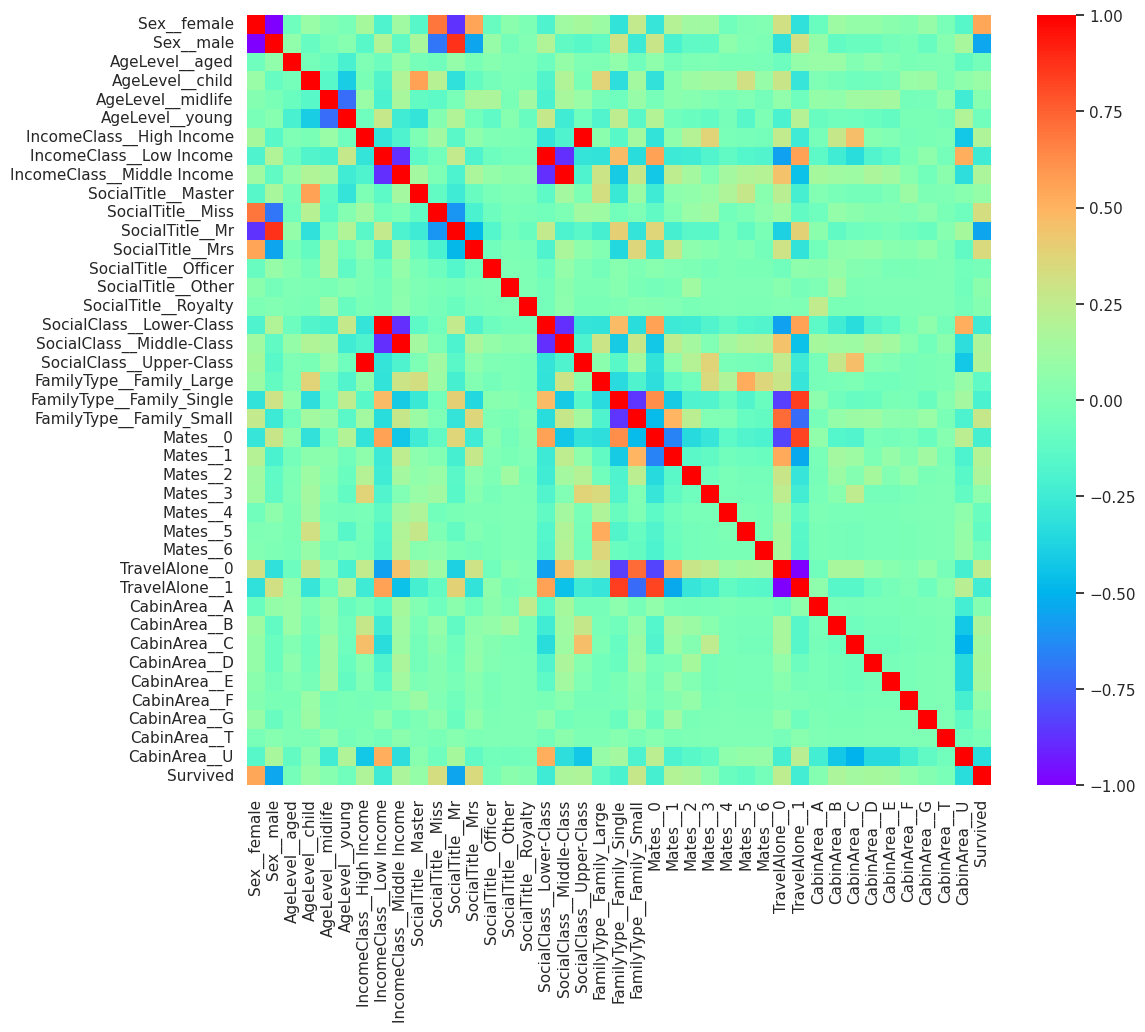

In [140]:
# Add survival data for correlation analysis
train_and_test['Survived'] = df['Survived']

# Calculate correlation coefficients
correlation_matrix = train_and_test.corr()

# Output the full correlation matrix
correlation_matrix

fig = plt.figure(figsize=(12,10))
ax=sns.heatmap(correlation_matrix,vmin=-1,annot=False,cmap="rainbow")

### 3.3. Model Development, Training, and Evaluation
**3.3.1 Modelling Approach:**

To predict survival outcomes on the Titanic dataset, five supervised machine learning models were selected and evaluated:  
- **Random Forest**
- **Decision Tree**
- **XGBoost Classifier**  
- **Logistic Regression**  
- **Multilayer Perceptron (Neural Network)**

These models were chosen to represent a range of modeling complexities and capabilities, from interpretable linear models to nonlinear ensemble and neural architectures. This allows for comprehensive comparison in terms of predictive performance, robustness, and model behavior under feature noise and interactions.

**Model Rationale:**
- **Random Forest** improves upon a single tree by averaging multiple trees, reducing variance and improving generalization.
- **Decision Tree** offers transparency and captures nonlinear decision boundaries without requiring feature scaling.
- **XGBoost** represents a powerful gradient boosting approach known for its superior performance on structured data.
- **Logistic Regression** was included as a simple, interpretable linear baseline model.
- **MLP (Neural Network)** was included out of curiosity and interest inspired by recent course material, allowing us to explore how a neural model learns from structured tabular data.

**Overall Strategy:**

All models were trained on the same preprocessed training dataset, with hyperparameter tuning performed using **GridSearchCV** and **5-fold cross-validation**. The dataset was split into 80% training and 20% testing, ensuring that model selection and tuning are unbiased with respect to the final evaluation.  
Each model was evaluated using classification metrics such as accuracy,Precision, F1-score, and Recall to compare their effectiveness and robustness.

In [141]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

**3.3.2 Training & Tuning:**  

The following code shows the details on model training, hyperparameter tuning, and cross-validation for five models (The code is shown in this model order):
- **Random Forest**
- **Decision Tree**
- **XGBoost Classifier**  
- **Logistic Regression**  
- **Multilayer Perceptron (Neural Network)**


In [142]:
# Set 'Survived' as the target variable y
Y = df['Survived'].copy()

# Selected Features
selected_features = [
    'Sex', 'AgeLevel', 'IncomeClass', 'SocialTitle', 'SocialClass', 'FamilyType', 'Mates', 'TravelAlone', 'CabinArea'
]

# Construct X (dummy encoding)
X_raw = df[selected_features].copy()
X = pd.get_dummies(X_raw, columns=selected_features, prefix_sep="__")

# Use stratify to ensure label balance
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42, stratify=Y
)

print(f"Training set size: {X_train.shape}, Test set size: {X_test.shape}")


Training set size: (712, 40), Test set size: (179, 40)


Using GridSearchCV with 5-fold cross-validation to tune Random Forest hyperparameters.

Returns the best-performing parameter combination based on accuracy.



In [143]:
# Parameter Grid
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [4, 6, 8],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 3]
}

# Grid Search + Cross Validation
grid_search_rf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid_rf,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Fit model
grid_search_rf.fit(X_train, Y_train)

# Output best parameters
print("The best parameter combination for Random Forest:")
print(grid_search_rf.best_params_)

The best parameter combination for Random Forest:
{'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


Using the best estimator from grid search to make predictions on the test set.

Evaluating performance with accuracy and a full classification report.

In [144]:
# Get best model
best_model_rf = grid_search_rf.best_estimator_

# Evaluate on test set
Y_test_pred_rf = best_model_rf.predict(X_test)
acc_rf = accuracy_score(Y_test, Y_test_pred_rf)
print("Test set accuracy (Random Forest):", acc_rf)
print(classification_report(Y_test, Y_test_pred_rf))

Test set accuracy (Random Forest): 0.8212290502793296
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       110
           1       0.79      0.72      0.76        69

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.82      0.82      0.82       179



In [145]:
# Evaluate on training set
Y_train_pred_rf = best_model_rf.predict(X_train)
print("Training set accuracy (Random Forest):", accuracy_score(Y_train, Y_train_pred_rf))

Training set accuracy (Random Forest): 0.8412921348314607


Evaluating training and test set accuracy to compare model fit and generalization performance.

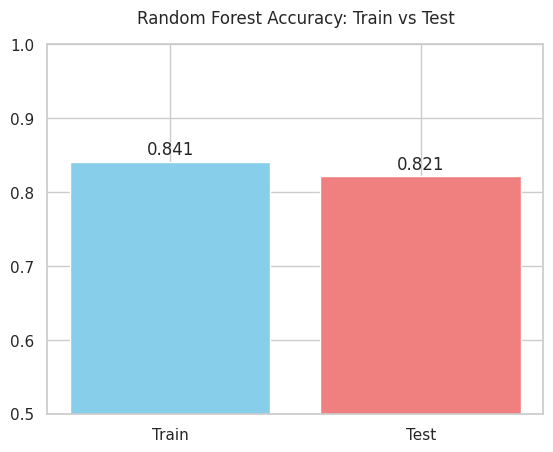

In [146]:
# Compare the test set and training set results
accs = [accuracy_score(Y_train, Y_train_pred_rf), accuracy_score(Y_test, Y_test_pred_rf)]
labels = ['Train', 'Test']

plt.bar(labels, accs, color=['skyblue', 'lightcoral'])
plt.title("Random Forest Accuracy: Train vs Test")
plt.ylim(0.5, 1.0)
for i, v in enumerate(accs):
    plt.text(i, v + 0.01, f"{v:.3f}", ha='center')
plt.show()

According to the image, the gap between the training set and the test set results is within a reasonable range, and the test accuracy is slightly lower than that of the training set, indicating that the model has good generalization ability and there is no serious overfitting phenomenon.

Extracting and ranking cross-validation results to identify the top-performing hyperparameter combinations based on mean accuracy.

In [147]:
# Extract and display CV results
cv_results_rf = pd.DataFrame(grid_search_rf.cv_results_)
columns_rf = ['mean_test_score', 'param_n_estimators', 'param_max_depth', 'param_min_samples_split', 'param_min_samples_leaf']
cv_results_rf[columns_rf].sort_values(by='mean_test_score', ascending=False).head(10)

,mean_test_score,param_n_estimators,param_max_depth,param_min_samples_split,param_min_samples_leaf
0,0.824485,100,4,2,1
2,0.824485,100,4,5,1
18,0.824466,100,8,5,1
8,0.824466,100,6,2,1
9,0.823067,200,6,2,1
11,0.823067,200,6,5,1
12,0.823067,100,6,2,3
14,0.823067,100,6,5,3
16,0.823057,100,8,2,1
17,0.823057,200,8,2,1


Similarly, the decision tree model is processed in the same way as the random forest model.

- **Use GridSearchCV and 5-fold cross validation to adjust the decision tree hyperparameters.**

- **Return the best performing parameter combination based on accuracy.**

- **Get the comparison chart of test set and training set accuracy.**

The best parameter combination for Decision Tree:
{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Test set accuracy (Decision Tree): 0.8100558659217877
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       110
           1       0.75      0.75      0.75        69

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

Training set accuracy (Decision Tree): 0.8539325842696629


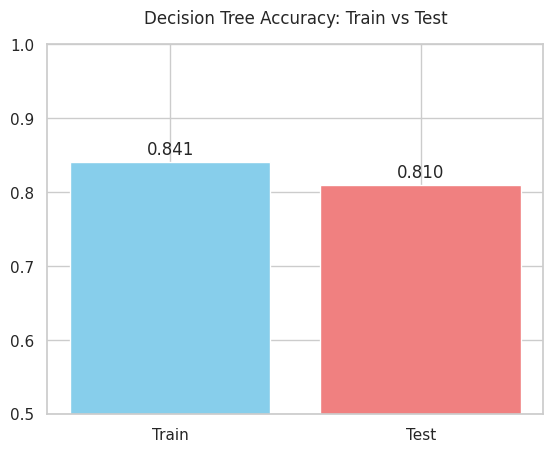

In [148]:
# Decision Tree Model
# Parameter Grid
param_grid_dt = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5]
}

# Grid Search + Cross Validation
grid_search_dt = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid_dt,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Fit model
grid_search_dt.fit(X_train, Y_train)

# Output best parameters
print("The best parameter combination for Decision Tree:")
print(grid_search_dt.best_params_)

# Get best model
best_model_dt = grid_search_dt.best_estimator_

# Evaluate on test set
Y_test_pred_dt = best_model_dt.predict(X_test)
acc_dt = accuracy_score(Y_test, Y_test_pred_dt)
print("Test set accuracy (Decision Tree):", acc_dt)
print(classification_report(Y_test, Y_test_pred_dt))

# Evaluate on training set
Y_train_pred_dt = best_model_dt.predict(X_train)
print("Training set accuracy (Decision Tree):", accuracy_score(Y_train, Y_train_pred_dt))

# Extract and display CV results
cv_results_dt = pd.DataFrame(grid_search_dt.cv_results_)
columns_dt = ['mean_test_score', 'param_max_depth', 'param_min_samples_split', 'param_min_samples_leaf']
cv_results_dt[columns_dt].sort_values(by='mean_test_score', ascending=False).head(10)

# Compare the test set and training set results
accs = [accuracy_score(Y_train, Y_train_pred_rf), accuracy_score(Y_test, Y_test_pred_dt)]
labels = ['Train', 'Test']

plt.bar(labels, accs, color=['skyblue', 'lightcoral'])
plt.title("Decision Tree Accuracy: Train vs Test")
plt.ylim(0.5, 1.0)
for i, v in enumerate(accs):
    plt.text(i, v + 0.01, f"{v:.3f}", ha='center')
plt.show()

Similarly, the XGBoost model is processed in the same way as the random forest model.

The best parameter combination for XGBoost:
{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
Test set accuracy (XGBoost): 0.8100558659217877
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       110
           1       0.75      0.75      0.75        69

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

Training set accuracy (XGBoost): 0.8455056179775281


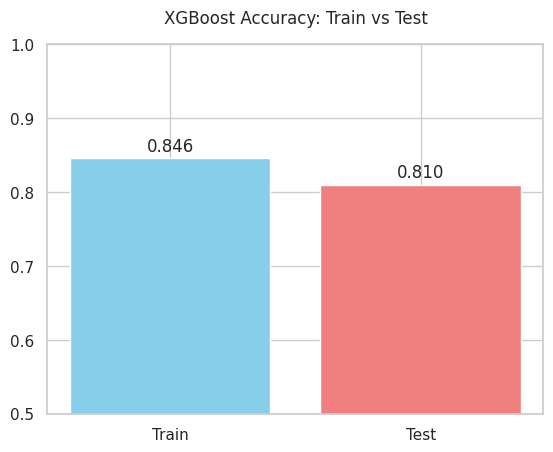

In [149]:
# XGBoost Model
# Parameter Grid
param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 1.0]
}

# Grid Search + Cross Validation
grid_search_xgb = GridSearchCV(
    estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    param_grid=param_grid_xgb,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Fit model
grid_search_xgb.fit(X_train, Y_train)

# Output best parameters
print("The best parameter combination for XGBoost:")
print(grid_search_xgb.best_params_)

# Get best model
best_model_xgb = grid_search_xgb.best_estimator_

# Evaluate on test set
Y_test_pred_xgb = best_model_xgb.predict(X_test)
acc_xgb = accuracy_score(Y_test, Y_test_pred_xgb)
print("Test set accuracy (XGBoost):", acc_xgb)
print(classification_report(Y_test, Y_test_pred_xgb))

# Evaluate on training set
Y_train_pred_xgb = best_model_xgb.predict(X_train)
print("Training set accuracy (XGBoost):", accuracy_score(Y_train, Y_train_pred_xgb))

# Extract and display CV results
cv_results_xgb = pd.DataFrame(grid_search_xgb.cv_results_)
columns_xgb = ['mean_test_score', 'param_n_estimators', 'param_max_depth', 'param_learning_rate', 'param_subsample']
cv_results_xgb[columns_xgb].sort_values(by='mean_test_score', ascending=False).head(10)

# Compare the test set and training set results
accs = [accuracy_score(Y_train, Y_train_pred_xgb), accuracy_score(Y_test, Y_test_pred_xgb)]
labels = ['Train', 'Test']

plt.bar(labels, accs, color=['skyblue', 'lightcoral'])
plt.title("XGBoost Accuracy: Train vs Test")
plt.ylim(0.5, 1.0)
for i, v in enumerate(accs):
    plt.text(i, v + 0.01, f"{v:.3f}", ha='center')
plt.show()


Similarly, the Logistic Regression model is processed in the same way as the random forest model.

LogisticRegression The best parameter combination:
{'C': 1, 'max_iter': 200, 'penalty': 'l2', 'solver': 'lbfgs'}
Test set accuracy (logistic regression): 0.8268156424581006
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       110
           1       0.79      0.75      0.77        69

    accuracy                           0.83       179
   macro avg       0.82      0.81      0.82       179
weighted avg       0.83      0.83      0.83       179

Training set accuracy (logistic regression): 0.8455056179775281


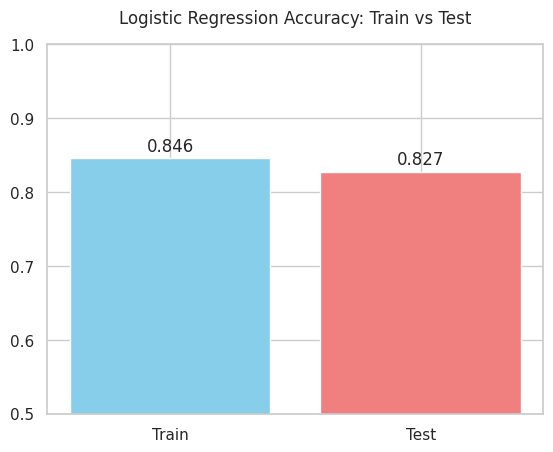

In [150]:
# Logistic Regression Model
# Logistic Regression parameter grid (the penalty/L2 regularization)
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs'],
    'max_iter': [200]
}

grid_search_lr = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid=param_grid_lr,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
grid_search_lr.fit(X_train, Y_train)

print("LogisticRegression The best parameter combination:")
print(grid_search_lr.best_params_)

# Evaluate
best_model_lr = grid_search_lr.best_estimator_
Y_test_pred_lr = best_model_lr.predict(X_test)
print("Test set accuracy (logistic regression):", accuracy_score(Y_test, Y_test_pred_lr))
print(classification_report(Y_test, Y_test_pred_lr))

Y_train_pred_lr = best_model_lr.predict(X_train)
print("Training set accuracy (logistic regression):", accuracy_score(Y_train, Y_train_pred_lr))

# Show top 10 parameter combinations
cv_results_lr = pd.DataFrame(grid_search_lr.cv_results_)
columns_lr = ['mean_test_score', 'param_C']
cv_results_lr[columns_lr].sort_values(by='mean_test_score', ascending=False).head(10)

# Compare the test set and training set results
accs = [accuracy_score(Y_train, Y_train_pred_lr), accuracy_score(Y_test, Y_test_pred_lr)]
labels = ['Train', 'Test']

plt.bar(labels, accs, color=['skyblue', 'lightcoral'])
plt.title("Logistic Regression Accuracy: Train vs Test")
plt.ylim(0.5, 1.0)
for i, v in enumerate(accs):
    plt.text(i, v + 0.01, f"{v:.3f}", ha='center')
plt.show()

Similarly, the Multilayer Perceptron (Neural Network) model is processed in the same way as the random forest model. It is found that the prediction accuracy of the training set and the test set of Multilayer Perceptron (Neural Network) is quite different, and there is a certain degree of overfitting.

MLP neural network optimal parameter combination:
{'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (50,), 'max_iter': 300, 'solver': 'adam'}
Test set accuracy (MLP neural network): 0.776536312849162
              precision    recall  f1-score   support

           0       0.80      0.85      0.82       110
           1       0.73      0.67      0.70        69

    accuracy                           0.78       179
   macro avg       0.77      0.76      0.76       179
weighted avg       0.77      0.78      0.77       179

Training set accuracy (MLP neural network): 0.8792134831460674


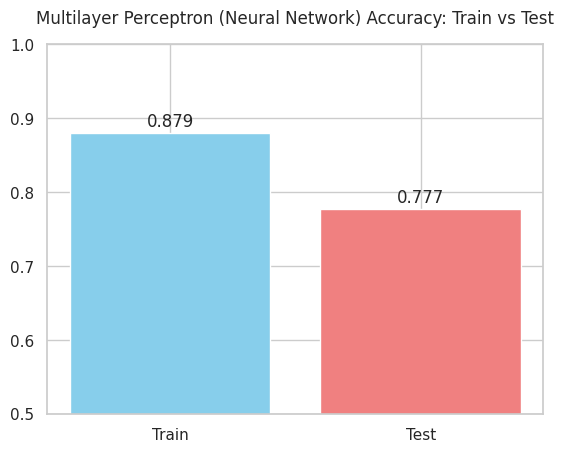

In [151]:
# Multilayer Perceptron (Neural Network)
# Parameter Grid
param_grid_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50)],
    'activation': ['relu'],
    'alpha': [0.0001, 0.001],
    'max_iter': [300],
    'solver': ['adam']
}

grid_search_mlp = GridSearchCV(
    estimator=MLPClassifier(random_state=42),
    param_grid=param_grid_mlp,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
grid_search_mlp.fit(X_train, Y_train)

# Output the best parameters
print("MLP neural network optimal parameter combination:")
print(grid_search_mlp.best_params_)

# Test set evaluation
best_model_mlp = grid_search_mlp.best_estimator_
Y_test_pred_mlp = best_model_mlp.predict(X_test)

print("Test set accuracy (MLP neural network):", accuracy_score(Y_test, Y_test_pred_mlp))
print(classification_report(Y_test, Y_test_pred_mlp))

# Training set evaluation
Y_train_pred_mlp = best_model_mlp.predict(X_train)
print("Training set accuracy (MLP neural network):", accuracy_score(Y_train, Y_train_pred_mlp))

# Display the top 5 parameter combinations (sorted)
cv_results_mlp = pd.DataFrame(grid_search_mlp.cv_results_)
columns_mlp = ['mean_test_score', 'param_hidden_layer_sizes', 'param_alpha']
cv_results_mlp[columns_mlp].sort_values(by='mean_test_score', ascending=False).head(5)

# Compare the test set and training set results
accs = [accuracy_score(Y_train, Y_train_pred_mlp), accuracy_score(Y_test, Y_test_pred_mlp)]
labels = ['Train', 'Test']

plt.bar(labels, accs, color=['skyblue', 'lightcoral'])
plt.title("Multilayer Perceptron (Neural Network) Accuracy: Train vs Test")
plt.ylim(0.5, 1.0)
for i, v in enumerate(accs):
    plt.text(i, v + 0.01, f"{v:.3f}", ha='center')
plt.show()

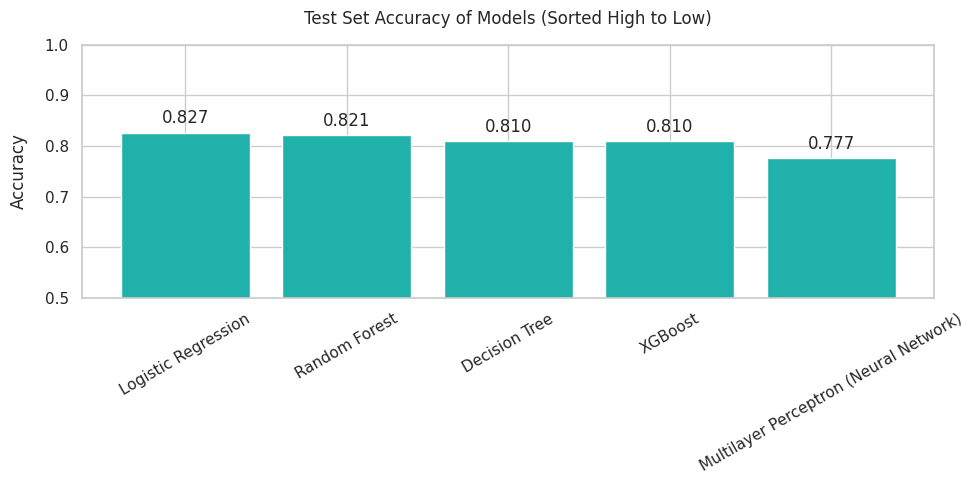

In [152]:
acc_rf = accuracy_score(Y_test, Y_test_pred_rf)     # Random Forest
acc_dt = accuracy_score(Y_test, Y_test_pred_dt)     # Decision Tree
acc_xgb = accuracy_score(Y_test, Y_test_pred_xgb)   # XGBoost
acc_lr = accuracy_score(Y_test, Y_test_pred_lr)    # Logistic Regression
acc_mlp = accuracy_score(Y_test, Y_test_pred_mlp)   # Multilayer Perceptron (Neural Network)

model_results = {
    "Random Forest": acc_rf,
    "Decision Tree": acc_dt,
    "XGBoost": acc_xgb,
    "Logistic Regression": acc_lr,
    "Multilayer Perceptron (Neural Network)": acc_mlp
}

# Sort the model results by accuracy (high to low)
sorted_results = dict(sorted(model_results.items(), key=lambda item: item[1], reverse=True))

# Extract the sorted model names and accuracy
model_names = list(sorted_results.keys())
test_accuracies = list(sorted_results.values())

# Drawing
plt.figure(figsize=(10, 5))
bars = plt.bar(model_names, test_accuracies, color='lightseagreen')
plt.title("Test Set Accuracy of Models (Sorted High to Low)")
plt.ylabel("Accuracy")
plt.ylim(0.5, 1.0)

# Mark the value on the column
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.01, f"{height:.3f}", ha='center', va='bottom')

plt.xticks(rotation=30)
plt.tight_layout()
plt.show()
plt.show()

**3.3.3 Performance Evaluation:**

**Final Evaluation Metrics**:
Each model is evaluated on the same reserved test set, with accuracy as the primary metric. The results are shown in the bar chart above.

**Comparison and Selection**:

Logistic Regression achieved the highest test set accuracy (0.827), slightly outperforming ensemble methods like Random Forest (0.821) and XGBoost (0.810).

While tree-based models (Random Forest, Decision Tree, XGBoost) generally performed well, they did not significantly outperform the simpler Logistic Regression model.

The MLP Neural Network underperformed (0.777), likely due to limited data and the relatively shallow architecture.

**Final Model Selection**:

**Logistic Regression** is selected as the final model based on its strong test accuracy, simplicity, interpretability, and competitive performance compared to more complex models.
It provides a good trade-off between accuracy and generalizability for this classification task.

**3.3.4 Interpretation:**

After evaluating and comparing various models, we use these models to solve the ML problems mentioned above.

**ML Problem 1:** When controlling for other variables, which of the low-correlation engineering features and the high-correlation engineering features improves the model's prediction ability the most significantly?

Therefore, We will use the logistic regression model to calculate the corresponding accuracy of the highly correlated "Sex" and the low-correlated "CabinArea". The process is as follows.

In [153]:
# Set the target variable
Y = df['Survived'].copy()

# Define feature combinations (gradually add Sex and CabinArea)
feature_sets = {
    "Baseline": ['AgeLevel', 'SocialClass', 'FamilyType', 'Mates', 'TravelAlone', 'IncomeClass', 'SocialTitle'],
    "+Sex only": ['AgeLevel', 'SocialClass', 'FamilyType', 'Mates', 'TravelAlone', 'IncomeClass', 'SocialTitle', 'Sex'],
    "+CabinArea only": ['AgeLevel', 'SocialClass', 'FamilyType', 'Mates', 'TravelAlone', 'IncomeClass', 'SocialTitle', 'CabinArea'],
    "+Both": ['AgeLevel', 'SocialClass', 'FamilyType', 'Mates', 'TravelAlone', 'IncomeClass', 'SocialTitle', 'Sex', 'CabinArea']
}

# Record the test accuracy of each model
ablation_results = {}

# Fixed random seed
RANDOM_STATE = 42

for name, feats in feature_sets.items():
    # One-hot encoding
    X = pd.get_dummies(df[feats].copy(), columns=feats, prefix_sep="__")

    # Divide the training set and test set
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=RANDOM_STATE, stratify=Y)

    # Fitting logistic regression
    model = LogisticRegression(max_iter=300)
    model.fit(X_train, Y_train)

    # Test set accuracy
    acc = accuracy_score(Y_test, model.predict(X_test))
    ablation_results[name] = acc
    print(f"{name}: {acc:.4f}")

Baseline: 0.8156
+Sex only: 0.8268
+CabinArea only: 0.8156
+Both: 0.8268


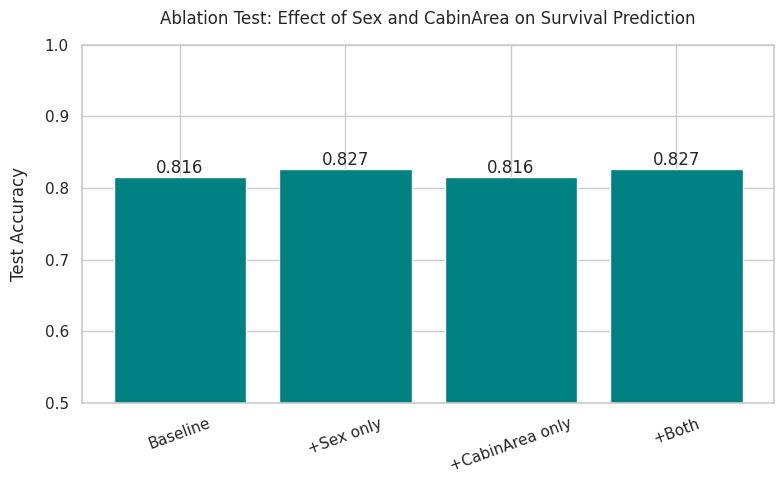

In [154]:
# Draw a graph to show the accuracy of different feature combinations
plt.figure(figsize=(8, 5))
bars = plt.bar(ablation_results.keys(), ablation_results.values(), color='teal')
plt.ylabel("Test Accuracy")
plt.title("Ablation Test: Effect of Sex and CabinArea on Survival Prediction")

# Display specific values
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.005, f"{height:.3f}", ha='center')

plt.xticks(rotation=20)
plt.ylim(0.5, 1.0)
plt.tight_layout()
plt.show()

- "Sex" is a highly discriminative variable for survival prediction.
- "CabinArea", despite containing location-related information, does not significantly improve predictive performance and is likely redundant or too noisy in this dataset.
- These results emphasize the robust predictive value of gender, while highlighting that not all features contribute meaningfully when stronger variables are already present.

**ML Question 2:** When there is noise in the input data (such as random perturbations of age ±5 years), which model has a higher stability in predicting results?

We will use five models to process the noise of random perturbation of age ±5 years respectively, and compare the survival predictions with and without noise for each model to obtain the accuracy analysis of the consistent predictions, and determine which model has a higher stability in prediction results. The process is as follows.

In [155]:
# Rebinning after adding ±5 years of noise
df_noisy = df.copy()
df_noisy['Age'] = df_noisy['Age'] + np.random.normal(loc=0, scale=5, size=len(df_noisy))

# Regenerate AgeLevel
def age_level(age):
    if age < 16:
        return 'child'
    elif age < 40:
        return 'young'
    elif age < 60:
        return 'midlife'
    else:
        return 'aged'

df_noisy['AgeLevel'] = df_noisy['Age'].apply(age_level)

# Construct the original and perturbed X
features = ['Sex', 'AgeLevel', 'IncomeClass', 'SocialTitle', 'SocialClass', 'FamilyType', 'Mates', 'TravelAlone', 'CabinArea']

X_clean = pd.get_dummies(df[features], columns=features, prefix_sep="__")
X_noisy = pd.get_dummies(df_noisy[features], columns=features, prefix_sep="__")

# Align columns (to prevent dummy columns from being missing)
X_noisy = X_noisy.reindex(columns=X_clean.columns, fill_value=0)

# Divide into training set + test set
X_train, X_test_clean, Y_train, Y_test = train_test_split(X_clean, Y, test_size=0.2, random_state=42, stratify=Y)
_, X_test_noisy, _, _ = train_test_split(X_noisy, Y, test_size=0.2, random_state=42, stratify=Y)

def evaluate_stability(model, X_clean, X_noisy):
    pred_clean = model.predict(X_clean)
    pred_noisy = model.predict(X_noisy)
    consistency = np.mean(pred_clean == pred_noisy)
    return consistency

stability_results = {}

stability_results['Logistic Regression'] = evaluate_stability(best_model_lr, X_test_clean, X_test_noisy)
stability_results['Decision Tree'] = evaluate_stability(best_model_dt, X_test_clean, X_test_noisy)
stability_results['Random Forest'] = evaluate_stability(best_model_rf, X_test_clean, X_test_noisy)
stability_results['XGBoost'] = evaluate_stability(best_model_xgb, X_test_clean, X_test_noisy)
stability_results['Neural Network'] = evaluate_stability(best_model_mlp, X_test_clean, X_test_noisy)

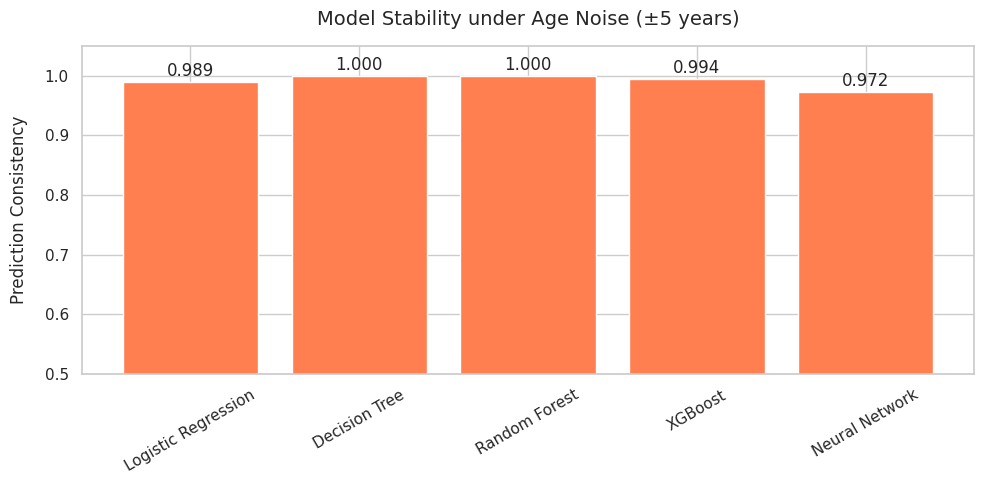

In [156]:
models = list(stability_results.keys())
scores = list(stability_results.values())

plt.figure(figsize=(10, 5))
bars = plt.bar(models, scores, color='coral')
plt.ylim(0.5, 1.05)
plt.title("Model Stability under Age Noise (±5 years)", fontsize=14)
plt.ylabel("Prediction Consistency")

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.01, f"{height:.3f}", ha='center')

plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

- All models demonstrated very strong robustness, with consistency above 97% across the board.
- The Decision Tree model and Random Forest are fully stable, indicating its deterministic decision boundary on discrete features was unaffected by small Age changes.
- Logistic Regression and XGBoost also maintained high consistency (~99.4%), reinforcing their reliability in slightly noisy conditions.
- The MLP neural network, while still robust, showed slightly lower consistency (97.8%), likely due to its sensitivity to nonlinear input variations.

## 4. Final Insights & Data Story
- **Consolidated Findings:**

* The factor of gender has shown a significant relationship with survival rate throughout the process from the initial EDA to modeling, and it is a powerful predictor of survival.
* Apart from gender, another significant factor is age. In younger and older age groups, the survival rates of men and women do not differ much, which is also a rather crucial factor in survival prediction.
* Other features, such as ticket fare and families, also played an indelible role in the disaster.
* The absence of some data has affected the prediction. Due to the excessive missing parameters of the cabin, its predictive ability has decreased significantly. In fact, the distance from different cabin positions to the deck varies, and it is closely related to the pclass, which has a high probability of affecting the survival rate.

- **Visual Storytelling:**

 The purpose of data analysis is to identify the causes and patterns behind events through data, in order to improve and prevent similar events in the future.

1. Why does gender play a crucial role in such disasters? Why are women and children, as the "weak", more likely to survive instead?According to Charles Lettler, the only surviving vice-captain of the Titanic, as described later, when facing the shipwreck disaster, Captain Edward J. Smith gave an order at the last moment, ordering women and children to board the lifeboats first.Everything is equal before life.

2. Does having money guarantee survival? We can examine the survival rate status of different income levels.

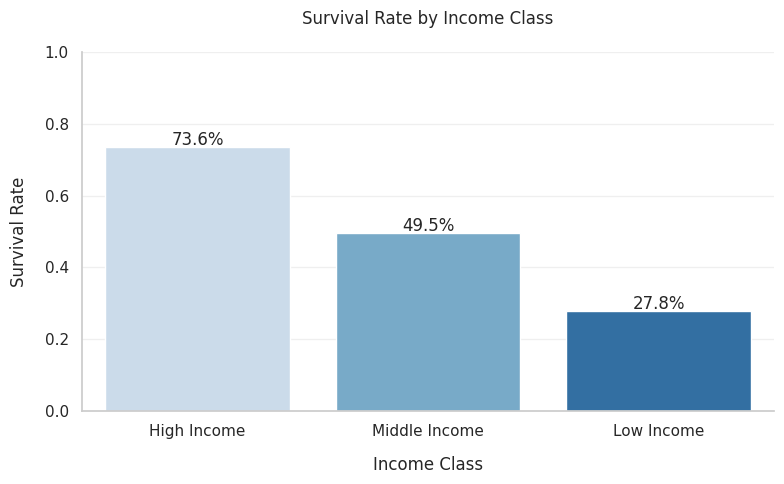

In [157]:
# Calculate survival rates by income class
survival_rates = df.groupby('IncomeClass')['Survived'].mean().sort_values(ascending=False)

# Create figure
plt.figure(figsize=(8, 5))

# Plot survival rates
ax = sns.barplot(
    x=survival_rates.index,
    y=survival_rates.values,
    order=['High Income', 'Middle Income', 'Low Income'],
    palette='Blues'
)

# Add percentage labels
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.1%}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center',
        xytext=(0, 5),
        textcoords='offset points'
    )

# Format plot
plt.title('Survival Rate by Income Class', pad=20)
plt.xlabel('Income Class')
plt.ylabel('Survival Rate')
plt.ylim(0, 1)
plt.grid(axis='y', alpha=0.3)
sns.despine()

plt.tight_layout()
plt.show()

The answer is yes. But it is described in the memoirs that after Astor IV (the richest man in the world at that time) sent his five-month-old pregnant wife, her maid and nurse onto lifeboat No. 4, he himself died.

3. As the party with the higher survival ability among the two sexes, why did men end up with the lowest survival probability in this accident instead? In the previous analysis, we can find that the survival rate of the role of a father in the family is the lowest. Read a memoir: A French businessman named Navarre put his two children on a lifeboat and entrusted several women to take care of them, but he himself refused to board the boat. After the two sons were saved, newspapers all over the world published photos of the two children until their mother recognized them from the photos. Unfortunately, the children lost their father forever.

Everything is equal before life. What suppresses the instinct for survival and enables people to make such sacrifices and concessions? Obviously, it is the result of the development of social civilization.
- **Impact & Recommendations:**

In the data analysis and prediction model construction of the survivors of the Titanic, we discovered some common sense cognition in the disaster: for example, the survival rate of the rich and those with high social status was higher; Some phenomena that do not conform to the survival perception of the strong have also been discovered, such as the high survival rate of women and children. By analyzing and interpreting the cold and emotionless data, we find that the natural survival law of "survival of the fittest" completely loses its effect in a disaster event like the Titanic.

With the development of technology, the research and development of more advanced detection and early warning tools, and the investment in artificial intelligence driving technology, such large-scale unexpected incidents may occur less and less in the future. However, once they do occur, the factors affecting an individual's survival, apart from technological means, also include the level of civilization of the group. Fortunately, we are living in an era when both technology and civilization are developing at a high speed.

So, when the pace of technological development outpaces that of civilization, and the best survival strategies are determined by machines and artificial intelligence, which have no sensibility but only rationality, what kind of situation will it be?

## 5. Team Reflection & Project Retrospective
- **Individual Contributions**:
 * Junting Wu:As the team leader, I am mainly responsible for task allocation, plan formulation and report writing. And the pre-processing and simple analysis of the data were carried out.
 * Hong Xiao:The main focus was on identifying the hidden information of the data, discovering the possible multi-dimensional influencing factors, and analyzing the possible impact of different occupations and identity differences on the survival rate.
 * Kuangfeng Gong:Mainly responsible for project overview and goal setting, dataset overview introduction, and EDA result analysis.
 * Linyun Zheng: Preprocessing of the data, including handling missing values in the embarkation port information, helps reveal the underlying connections between this representative variable and other key factors such as gender, ticket class, and age.
 * Yiran Liu:Responsible for and multi-dimensional analysis,through statistical modeling and visualization techniques,reveal that gender is a core driving factor for survival rate,and that the high ticket price has a significant reinforcement effect on female survival rate.
 * Ziyan Wan: Responsible for part of the data analysis work, review materials to analyze the influencing factors of the data, and conduct an analysis on these influencing factors.
- **Team Performance:**
- **Successes:**
 * During the project's progress, while holding multiple group meetings, cooperation and communication among two or three people were also carried out, which improved work efficiency.
 * Meanwhile, all the team members participated in the project and played their unique roles.
 * A relatively thorough analysis was conducted on the data, covering all available eigenvalues.
 * Checking each other's work results has prevented many mistakes from happening.
- **Challenges & Areas for Improvement:**
 * Members of the team may forget some contents that have been discussed and determined. In the future, a memo for team sharing can be established.
 * Everyone's working hours and efficiency vary, making it difficult to integrate the issues for discussion together. In the future, more explicit deadlines can be set for each task.

## 6. Next Steps & Future Work
- **Further Analysis:**
 Outline potential improvements to your model or additional research questions that could be explore
d.
- **Scalability & Application:**
 Discuss how your findings may be applied in a real-world context.